# Importing all the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from datetime import date

# EDA 1: Bike Details Dataset

**Load Bike Details Dataset**

In [ ]:
df = pd.read_csv("BIKE_DETAILS.csv")
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


**Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [ ]:
df.duplicated().sum()

6

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(1055, 7)

In [ ]:
df[['name', 'ex_showroom_price']]

,name,ex_showroom_price
0,Royal Enfield Classic 350,NaN
1,Honda Dio,NaN
2,Royal Enfield Classic Gunmetal Grey,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],89643.0
4,Yamaha SZ [2013-2014],NaN
...,...,...
1056,Activa 3g,52000.0
1057,Honda CB twister,51000.0
1058,Bajaj Discover 125,57000.0
1059,Honda CB Shine,58000.0


In [ ]:
df['ex_showroom_price'].isnull().sum()

433

**EDA**

1. What is the range of selling prices in the dataset?

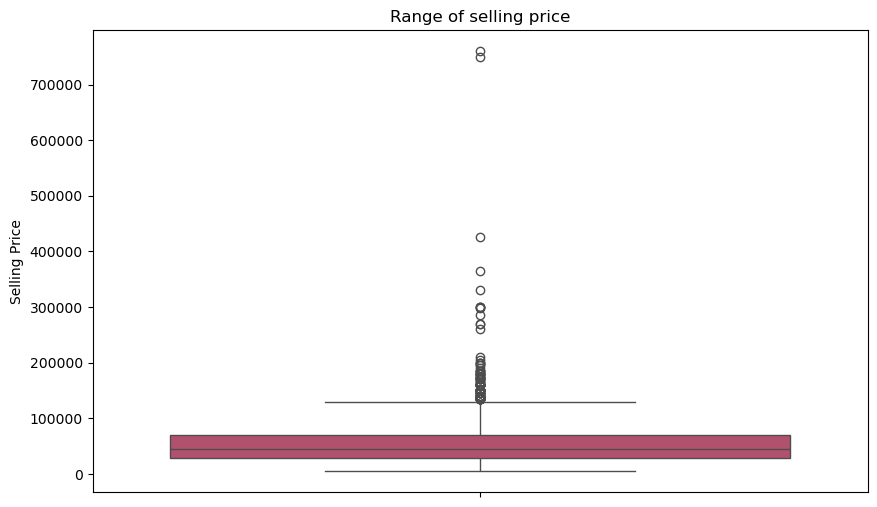

The range of selling prices in the dataset is (5000, 760000)


In [ ]:
ans = (df['selling_price'].min(), df['selling_price'].max())
plt.figure(figsize = (10,6))
sns.boxplot(df['selling_price'], palette = 'flare')
plt.title('Range of selling price')
plt.ylabel('Selling Price')
plt.show()
print(f"The range of selling prices in the dataset is {ans}")

2. What is the median selling price for bikes in the dataset?

In [ ]:
ans = df['selling_price'].median()
print(f"The Median of the Selling Price is {ans}")

The Median of the Selling Price is 45000.0


3. What is the most common seller type?

In [ ]:
df['seller_type'].value_counts()

seller_type
Individual    1049
Dealer           6
Name: count, dtype: int64

<Axes: >

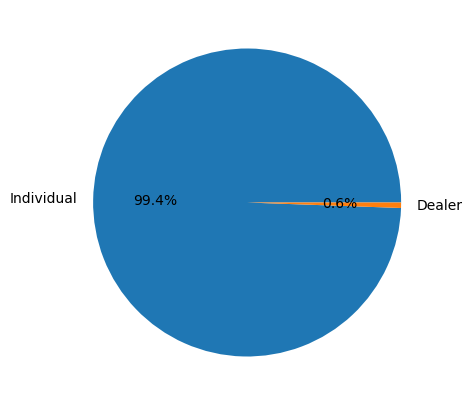

In [ ]:
df['seller_type'].value_counts().plot.pie(x = 'df', autopct = '%1.1f%%', figsize = (5,5), label = "")

The most common seller type is 'Individual' which is 99.4% of the Total.

4. How many bikes have driven more than 50,000 kilometers?

In [ ]:
ans = df[df['km_driven'] > 50000]['km_driven'].count()
print(f"{ans} bikes have driven more than 50,000 kilometers.")

168 bikes have driven more than 50,000 kilometers.


5. What is the average km_driven value for each ownership type?

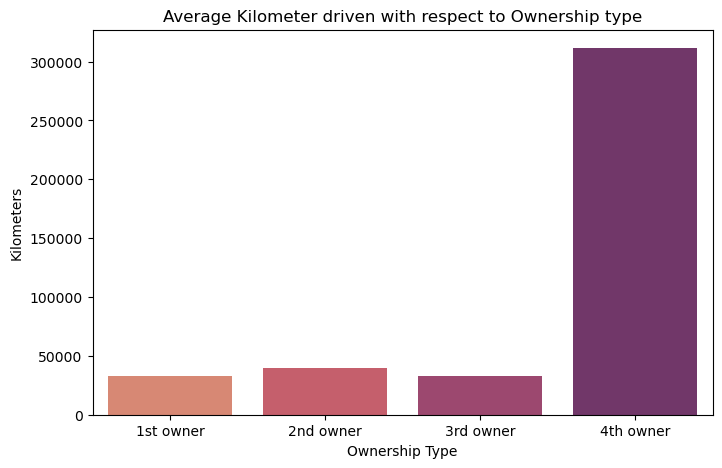

The average km_driven value for each ownership type is:


,owner,km_driven
0,1st owner,32732.710240
1,2nd owner,39288.991870
2,3rd owner,33292.181818
3,4th owner,311500.000000


In [ ]:
ans = df.groupby('owner')['km_driven'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x = 'owner', y = 'km_driven', data = ans, palette = 'flare')
plt.xlabel('Ownership Type')
plt.ylabel('Kilometers')
plt.title('Average Kilometer driven with respect to Ownership type')
plt.show()
print("The average km_driven value for each ownership type is:")
ans

6. What proportion of bikes are from the year 2015 or older?

In [ ]:
df['older'] = df['year']>=2015
df['older']=df['older'].replace(True, "Older or equal to 2015").replace(False, "Not Older than 2015")

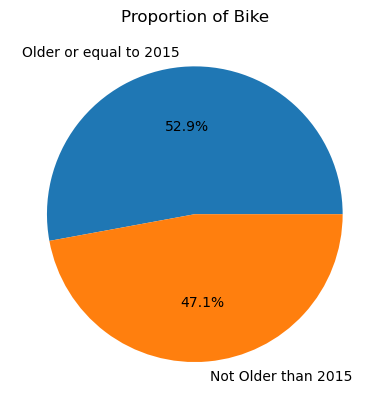

In [ ]:
df['older'].value_counts().plot.pie(x='df', autopct = '%1.1f%%', label = '')
plt.title('Proportion of Bike')
plt.show()

52.9 % of bikes are from the year 2015 or older.

7. What is the trend of missing values across the dataset?

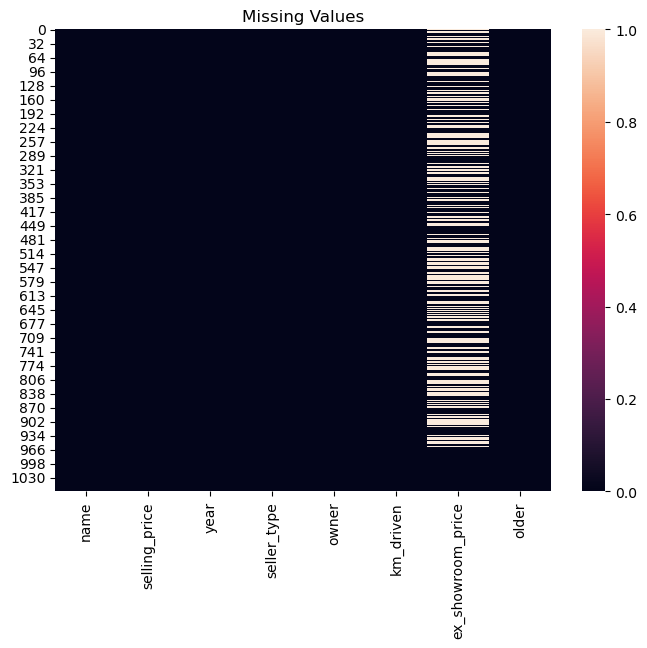

The total Missing Values in Ex Showroom Price is 433


In [ ]:
ans = df['ex_showroom_price'].isnull().sum()
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())
plt.title('Missing Values')
plt.show()
print("The total Missing Values in Ex Showroom Price is", ans)

8. What is the highest ex_showroom_price recorded, and for which bike?

In [ ]:
df[df['ex_showroom_price']==df['ex_showroom_price'].max()][['name', 'ex_showroom_price']]

,name,ex_showroom_price
134,Harley-Davidson Street Bob,1278000.0


9. What is the total number of bikes listed by each seller type?

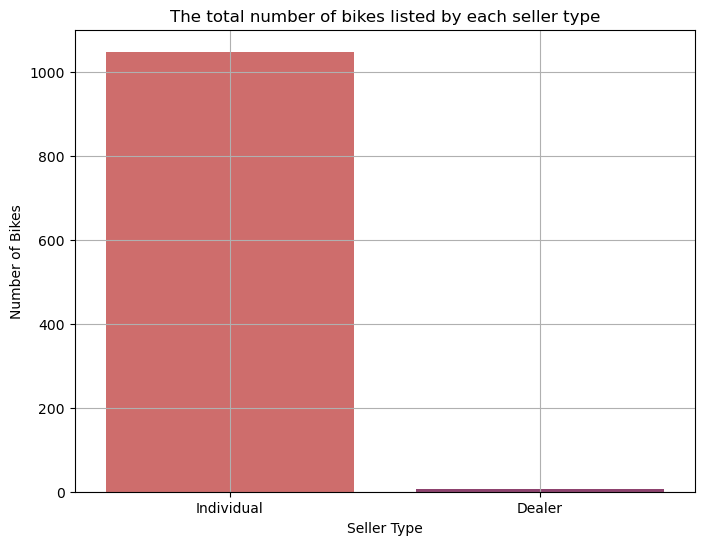

The total number of Bike listed by each seller are:


,Seller_type,Number_of_bikes
0,Dealer,6
1,Individual,1049


In [ ]:
ans = df.groupby('seller_type')['name'].count().reset_index()
ans.columns = ['Seller_type', 'Number_of_bikes']

plt.figure(figsize=(8,6))
sns.countplot(x=df['seller_type'], data = df, palette = 'flare')
plt.xlabel('Seller Type')
plt.ylabel('Number of Bikes')
plt.title('The total number of bikes listed by each seller type')
plt.grid()
plt.show()

print('The total number of Bike listed by each seller are:')
ans

10. What is the relationship between selling _price and km_driven for first-owner bikes?

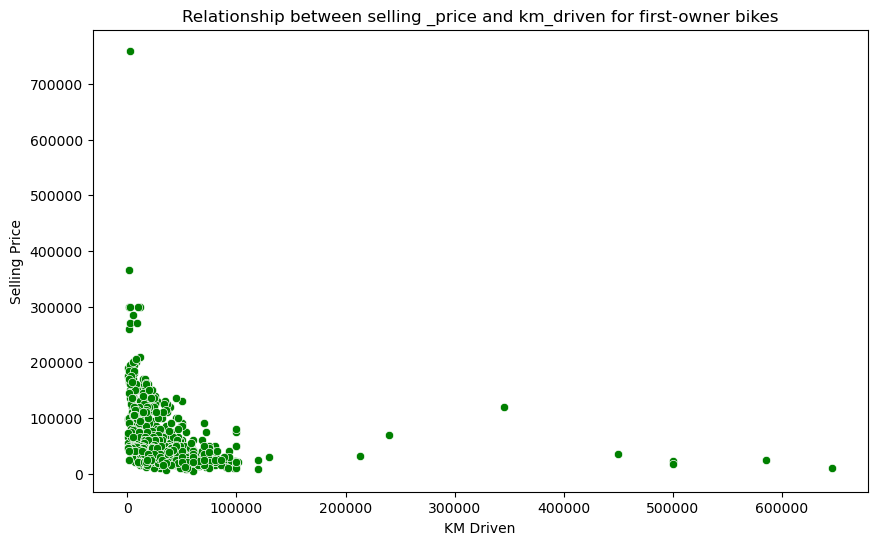

Correlation:
                km_driven  selling_price
km_driven       1.000000      -0.212005
selling_price  -0.212005       1.000000


In [ ]:
ans = df[df['owner'] == '1st owner']
plt.figure(figsize=(10,6))
sns.scatterplot(x=ans['km_driven'], y = ans['selling_price'], marker = 'o', color = 'g')
plt.title('Relationship between selling _price and km_driven for first-owner bikes')
plt.ylabel('Selling Price')
plt.xlabel('KM Driven')
plt.show()

correlation = df[['km_driven', 'selling_price']].corr()
print("Correlation:\n", correlation)

11. Identify and remove outliers in the km _driven column using the IQR method.

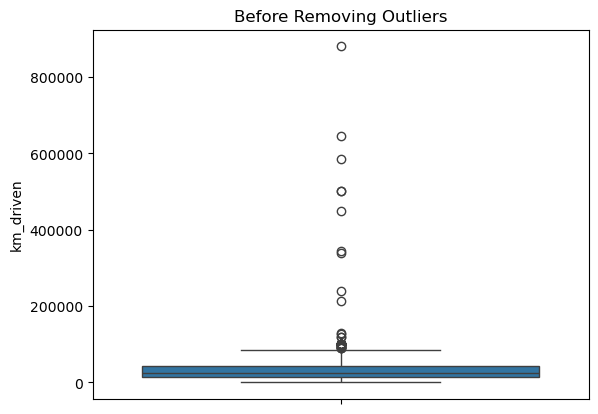

In [ ]:
sns.boxplot(df['km_driven'])
plt.title('Before Removing Outliers')
plt.show()

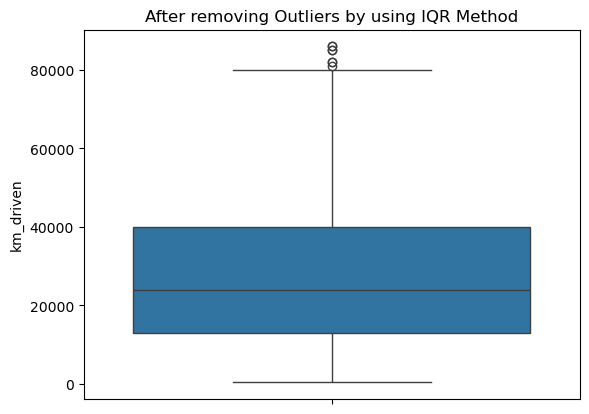

In [ ]:
q1 = df['km_driven'].quantile(0.25)
q3 = df['km_driven'].quantile(0.75)

iqr = q3-q1

lower_fence = q1-1.5*iqr
upper_fence = q3+1.5*iqr

df_filter = df[(df['km_driven']>=lower_fence) & (df['km_driven']<=upper_fence)]

sns.boxplot(df_filter['km_driven'])
plt.title('After removing Outliers by using IQR Method')
plt.show()

12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

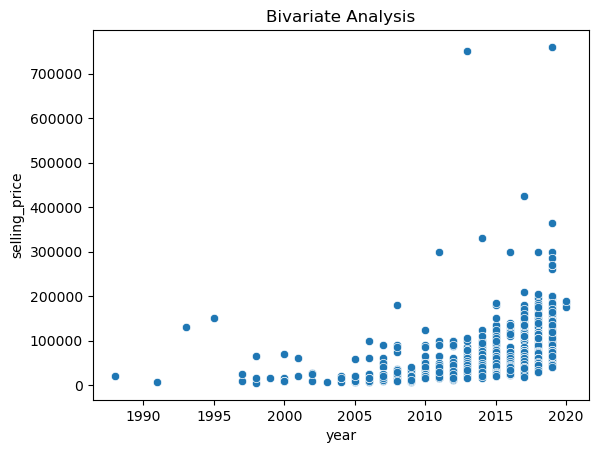

Correlation:                     year  selling_price
year           1.000000       0.400947
selling_price  0.400947       1.000000


In [ ]:
sns.scatterplot(x=df['year'], y=df['selling_price'])
plt.title('Bivariate Analysis')
plt.show()
corr = df[['year','selling_price']].corr()
print('Correlation: ', corr)

13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)?

In [ ]:
df['Bike_age']=date.today().year - df['year']

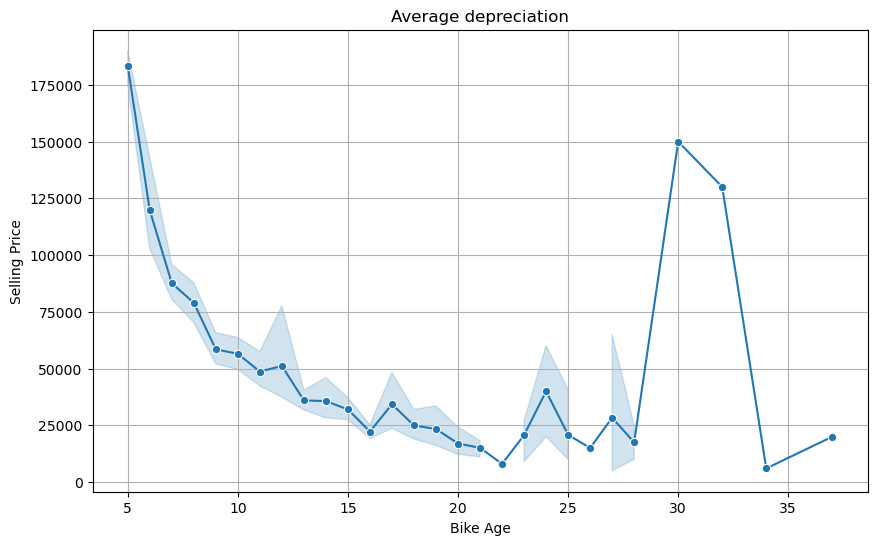

The Correlation between the selling Price and Bike age


,selling_price,Bike_age
selling_price,1.000000,-0.400947
Bike_age,-0.400947,1.000000


In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x = df['Bike_age'], y = df['selling_price'], marker = 'o')
plt.title('Average depreciation')
plt.xlabel('Bike Age')
plt.ylabel('Selling Price')
plt.grid()
plt.show()
print('The Correlation between the selling Price and Bike age')
df[['selling_price', 'Bike_age']].corr()

14. Which bike names are priced significantly above the average price for their manufacturing year?

In [ ]:
average_price = df.groupby('year')['selling_price'].mean()
df = df.merge(average_price.rename('avg_price'), on='year')
df[df['selling_price'] > df['avg_price']]['name'].reset_index()

,index,name
0,0,Royal Enfield Classic 350
1,2,Royal Enfield Classic Gunmetal Grey
2,3,Yamaha Fazer FI V 2.0 [2016-2018]
3,7,Royal Enfield Bullet 350 [2007-2011]
4,13,Yamaha YZF R3
...,...,...
327,998,Bajaj Pulsar NS 200
328,999,TVS Apache RTR 160
329,1002,Bajaj Pulsar 220 F
330,1006,Bajaj Pulsar NS 200


15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

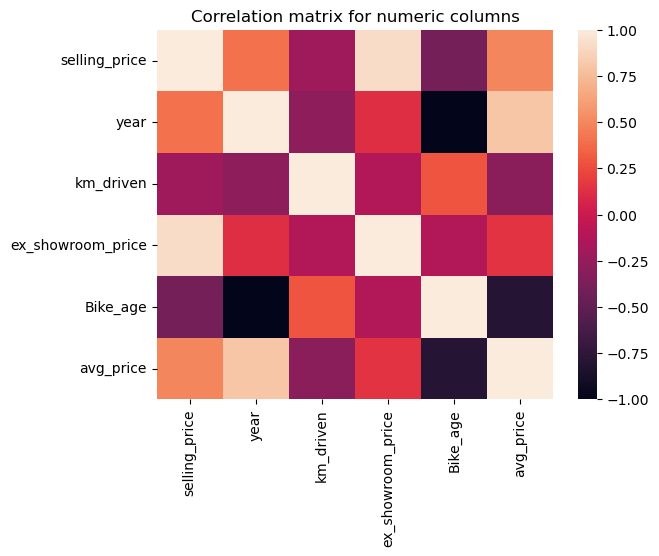

In [ ]:
num_col = [feature for feature in df.columns if df[feature].dtypes != 'O']
num_col_corr_mat = df[num_col].corr()
sns.heatmap(num_col_corr_mat)
plt.title('Correlation matrix for numeric columns')
plt.show()

# EDA 2: Car Sale Dataset

**Read the Dataset**

In [ ]:
df = pd.read_csv('Car_Sale.csv')
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


**Cleaning of Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [ ]:
df[df['Customer Name'].isnull()]

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
7564,C_CND_007565,11/5/2022,NaN,Male,680000,Saab-Belle Dodge,Dodge,Ram Pickup,DoubleÂ Overhead Camshaft,Auto,Pale White,45000,60504-7114,Hardtop,7203103,Aurora


In [ ]:
df['Customer Name'].fillna('Donot Know', inplace = True)

In [ ]:
df.isnull().sum()

Car_id           0
Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

**EDA**

1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

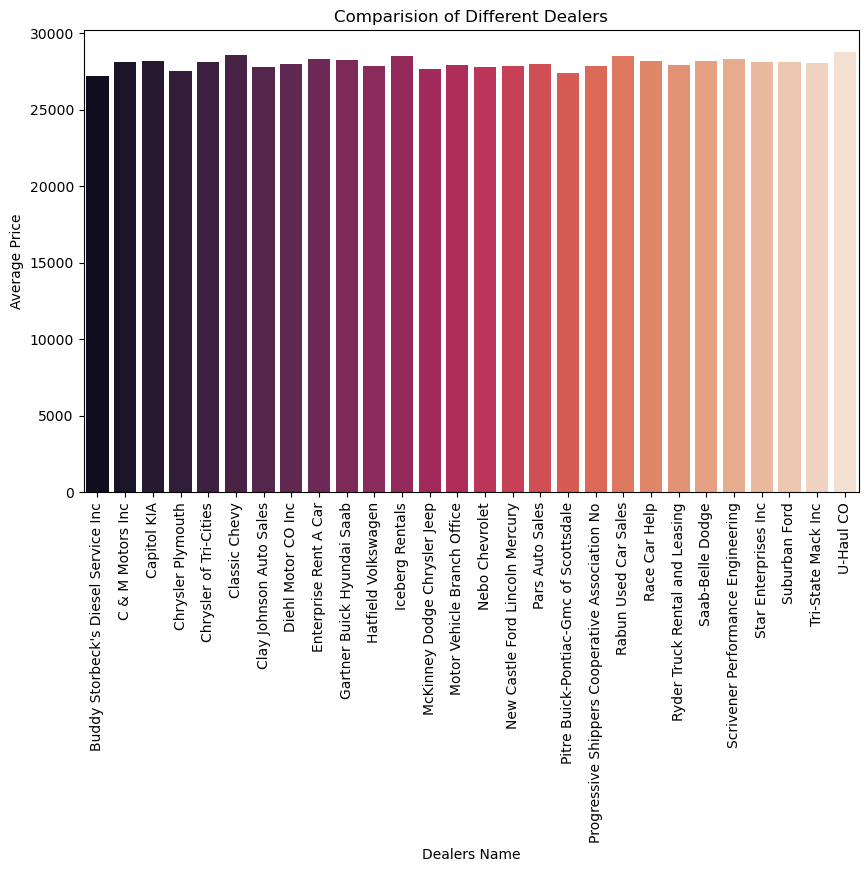

In [ ]:
ans = df.groupby('Dealer_Name')['Price ($)'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x=ans['Dealer_Name'], y = ans['Price ($)'], palette='rocket')
plt.xticks(rotation = 90)
plt.title('Comparision of Different Dealers')
plt.xlabel('Dealers Name')
plt.ylabel('Average Price')
plt.show()

2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends?

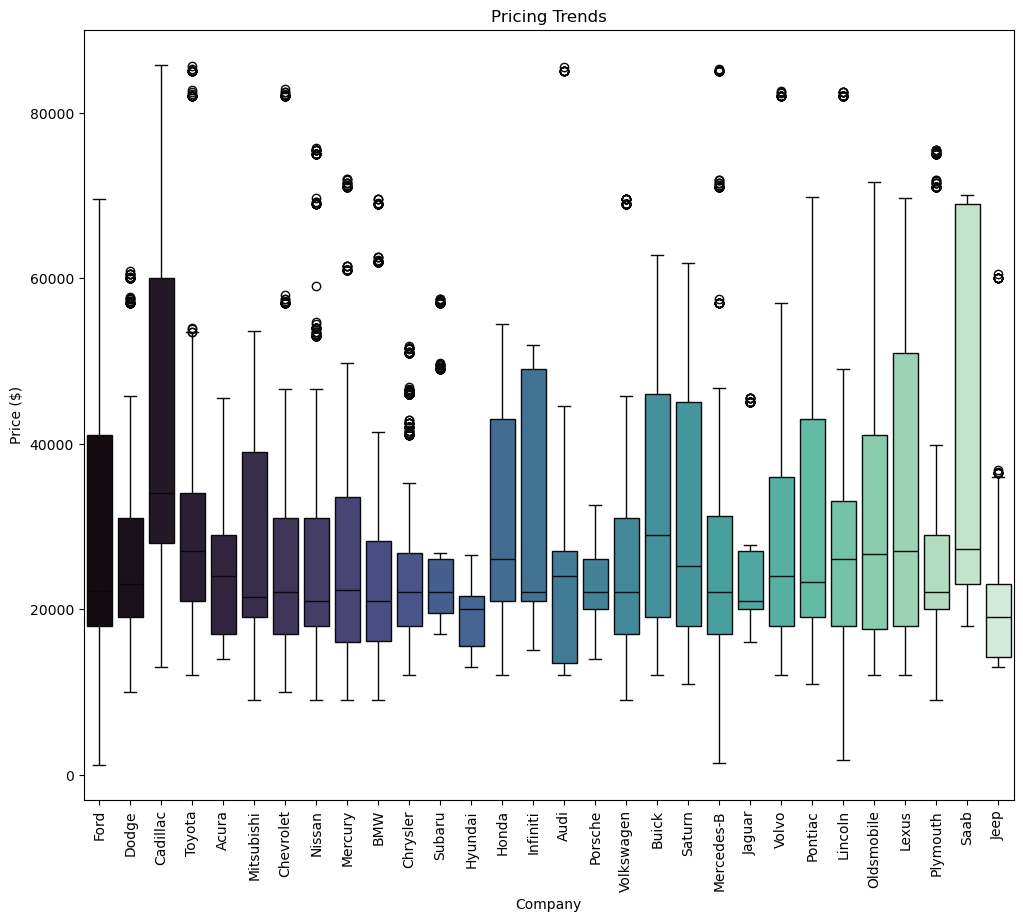

The highest Variation in prices is of:


Company           Lincoln
Price ($)    19658.050211
Name: 15, dtype: object

In [ ]:
price_var = df.groupby('Company')['Price ($)'].std().reset_index()
highest_pr_var = price_var.loc[price_var['Price ($)'].idxmax()]
highest_pr_var

plt.figure(figsize=(12,10))
sns.boxplot(x=df['Company'], y=df['Price ($)'], palette='mako')
plt.xticks(rotation = 90)
plt.title('Pricing Trends')
plt.show()

print('The highest Variation in prices is of:')
highest_pr_var

3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare?

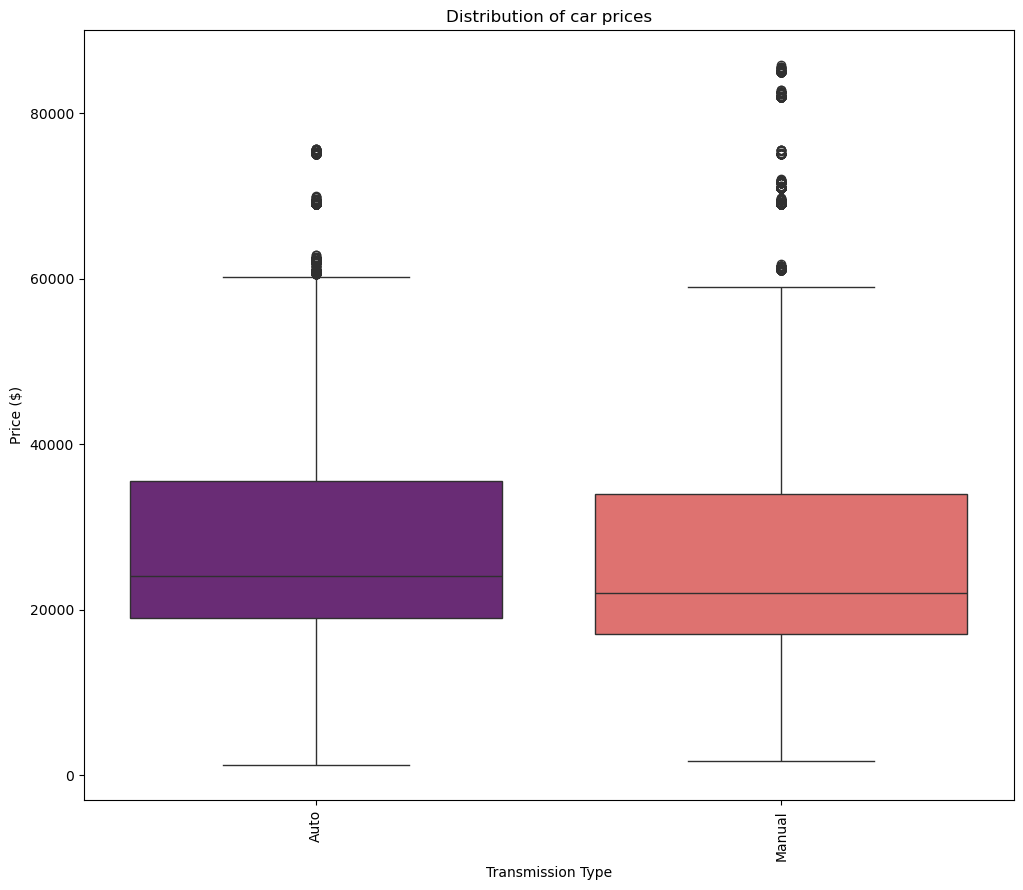

IQR Comparision


,0.25,0.75,IQR VALUES
Transmission,,,
Auto,19000.0,35500.0,16500.0
Manual,17000.0,34000.0,17000.0


In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(x=df['Transmission'], y=df['Price ($)'], palette='magma')
plt.xticks(rotation = 90)
plt.title('Distribution of car prices')
plt.xlabel('Transmission Type')
plt.show()

print('IQR Comparision')
ans = df.groupby('Transmission')['Price ($)'].quantile([0.25,0.75]).unstack()
ans['IQR VALUES'] = ans[0.75]-ans[0.25]
ans

4. What is the distribution of car prices across different regions?

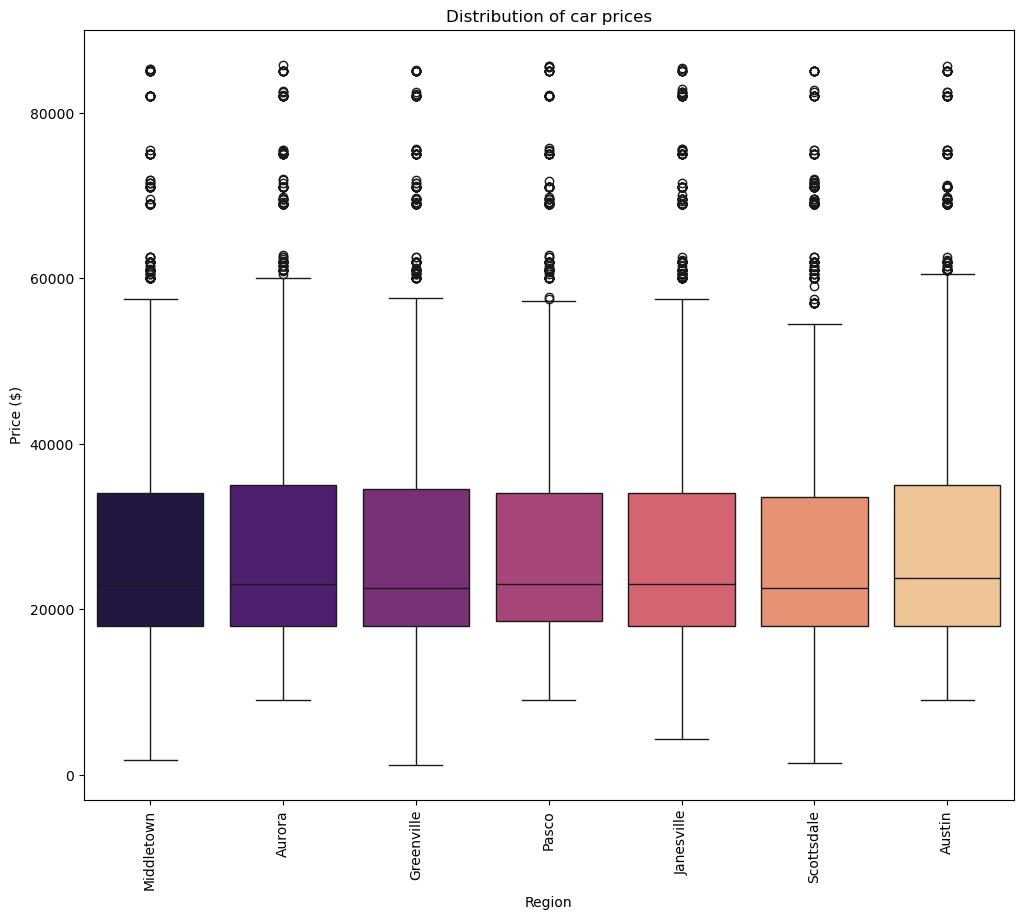

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(x=df['Dealer_Region'], y=df['Price ($)'], palette='magma')
plt.xticks(rotation = 90)
plt.title('Distribution of car prices')
plt.xlabel('Region')
plt.show()

5. What is the distribution of cars based on body styles?

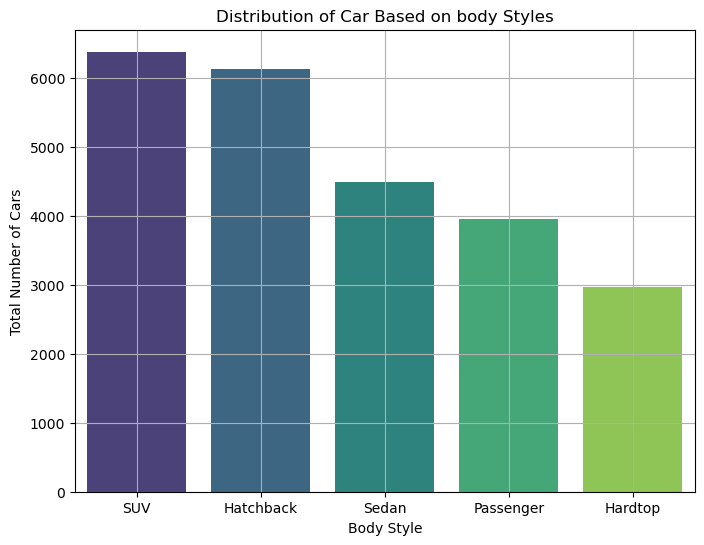

In [ ]:
ans = df['Body Style'].value_counts().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x=ans['Body Style'], y=ans['count'], palette='viridis')
plt.ylabel('Total Number of Cars')
plt.title('Distribution of Car Based on body Styles')
plt.grid()
plt.show()

6. How does the average selling price of cars vary by customer gender and annual income?

In [ ]:
ans = df.copy()
def convert(df, col, labels):
    edge = [df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]
    df[col] = pd.cut(df[col], labels = labels, duplicates = 'drop', bins = edge)

labels = ['very low','low', 'medium', 'above']
convert(ans,'Annual Income', labels)

In [ ]:
ans = ans.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().unstack()
ans

Annual Income,very low,low,medium,above
Gender,,,,
Female,28059.801521,28353.154717,28309.448449,28402.914851
Male,27925.622775,27837.224550,28283.473409,28091.421784


<Axes: xlabel='Annual Income', ylabel='Gender'>

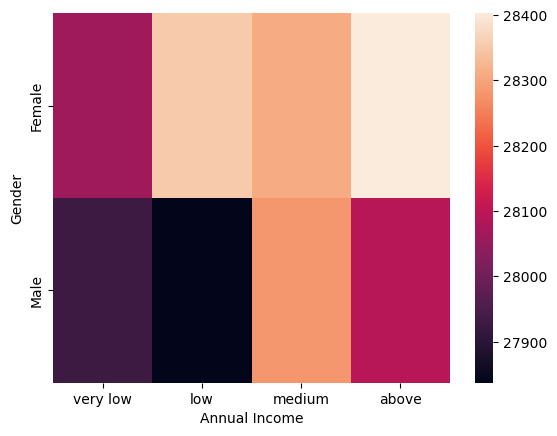

In [ ]:
sns.heatmap(ans)

7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

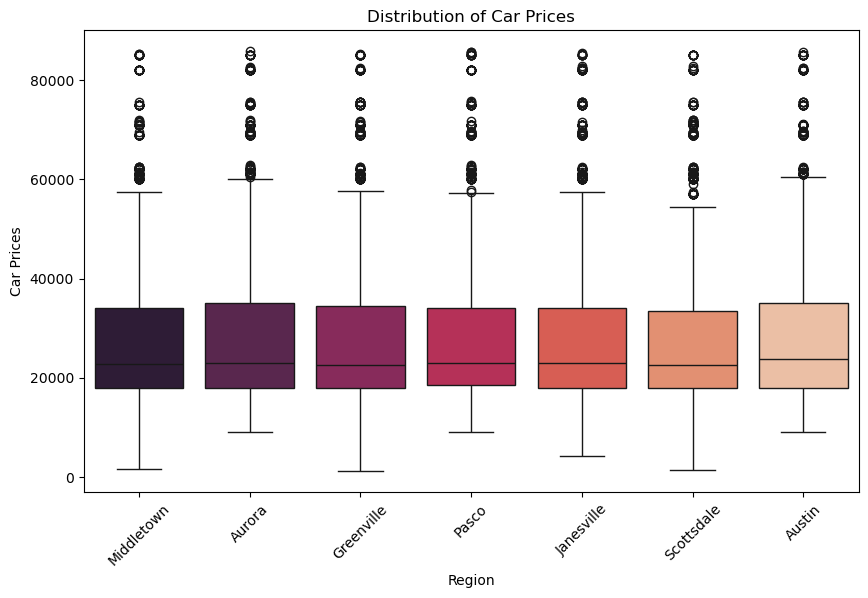

The total number of Car Sold by region:


,Dealer_Region,Car_id
0,Aurora,3130
1,Austin,4135
2,Greenville,3128
3,Janesville,3821
4,Middletown,3128
5,Pasco,3131
6,Scottsdale,3433


In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'Dealer_Region', y = 'Price ($)', data = df, palette = 'rocket')
plt.ylabel('Car Prices')
plt.xlabel('Region')
plt.title('Distribution of Car Prices')
plt.xticks(rotation = 45)
plt.show()
print("The total number of Car Sold by region:")
df.groupby('Dealer_Region')['Car_id'].count().reset_index()

8. How does the average car price differ between cars with different engine sizes?

In [ ]:
ans = df.groupby('Engine')['Price ($)'].mean().reset_index()
ans

,Engine,Price ($)
0,DoubleÂ Overhead Camshaft,28248.525972
1,Overhead Camshaft,27914.710631


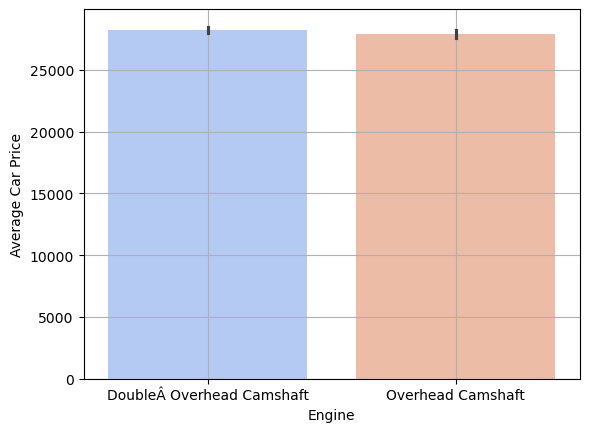

In [ ]:
sns.barplot(x='Engine', y='Price ($)', data=df, palette = 'coolwarm')
plt.ylabel('Average Car Price')
plt.grid()
plt.show()

9. How do car prices vary based on the customer’s annual income bracket?

In [ ]:
df['income_bracket'] = pd.cut(df['Annual Income'], bins=[0, 500000, 1500000, 3000000], labels=['Low', 'Middle', 'High'])
ans = df.groupby('income_bracket')['Price ($)'].std().reset_index()
ans

,income_bracket,Price ($)
0,Low,14965.810641
1,Middle,14734.412697
2,High,14487.560016


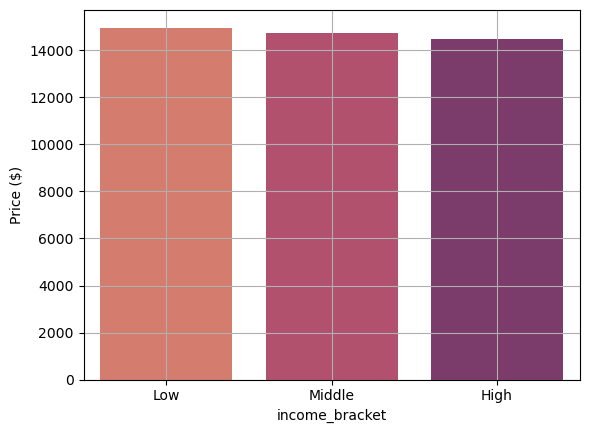

In [ ]:
sns.barplot(x='income_bracket', y='Price ($)',data = ans, palette = 'flare')
plt.grid()
plt.show()

10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

In [ ]:
ans = df['Model'].value_counts().sort_values(ascending = False).reset_index().head()
ans

,Model,count
0,Diamante,418
1,Prizm,411
2,Silhouette,411
3,Passat,391
4,Ram Pickup,383


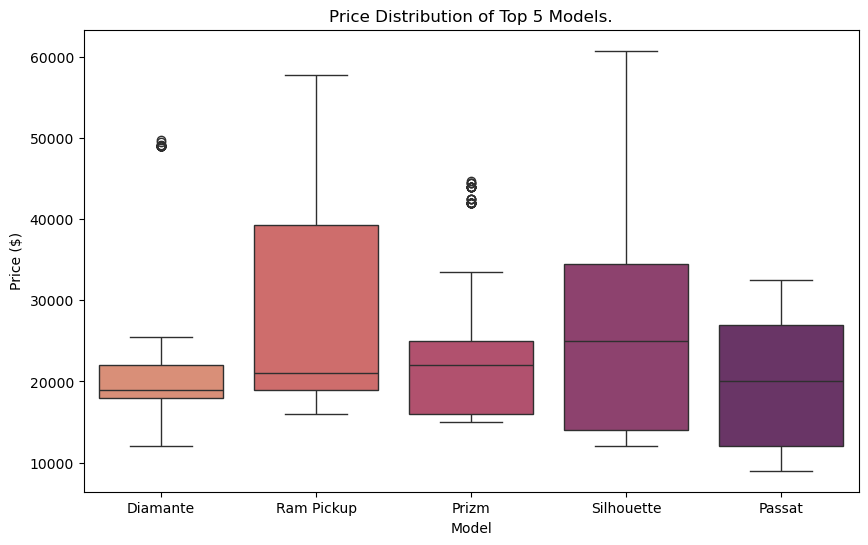

In [ ]:
def checkif(df, col, data):
    return df[df[col].isin(data)]

a=ans['Model'].tolist()

ans = checkif(df, 'Model', a)

plt.figure(figsize=(10,6))
sns.boxplot(x='Model', y='Price ($)', data = ans, palette = 'flare')
plt.title('Price Distribution of Top 5 Models.')
plt.show()

11. How does car price vary with engine size across different car colors, and which colors have the highest price
variation?

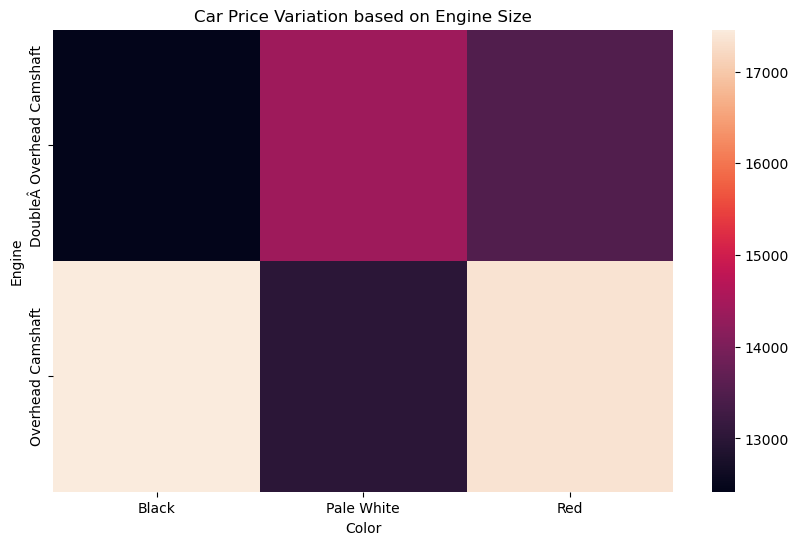

Car Price Variation based on Engine Size
Color                             Black    Pale White           Red
Engine                                                             
DoubleÂ Overhead Camshaft  12418.674126  14402.413401  13499.354247
Overhead Camshaft          17457.405345  13000.103061  17346.642554


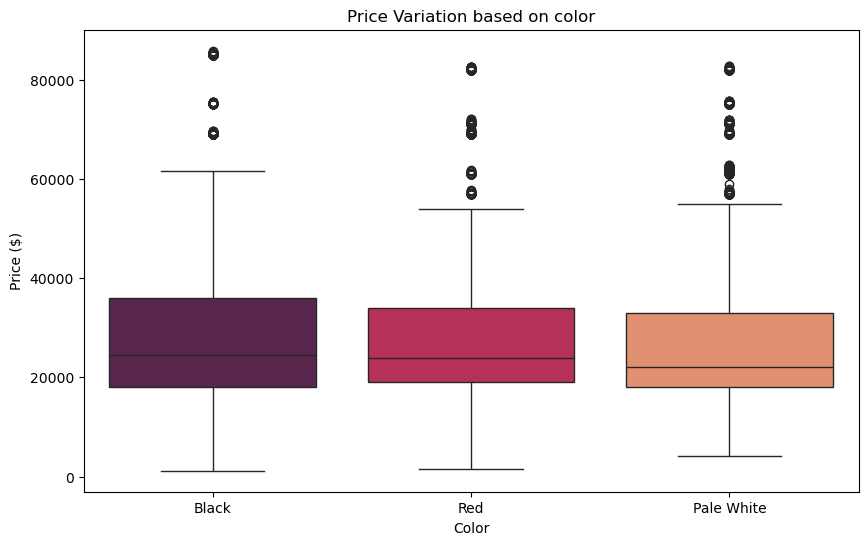

Highest Variation based on color:


Color                 Red
Price ($)    15519.360962
Name: 2, dtype: object

In [ ]:
ans = df.groupby(['Engine', 'Color'])['Price ($)'].std().unstack()
plt.figure(figsize=(10,6))
plt.title('Car Price Variation based on Engine Size')
sns.heatmap(ans)
plt.show()
print('Car Price Variation based on Engine Size')
print(ans)

plt.figure(figsize=(10,6))
sns.boxplot(x='Color', y='Price ($)', data=df, palette = 'rocket')
plt.title('Price Variation based on color')
plt.show()
print('Highest Variation based on color:')
a = df.groupby('Color')['Price ($)'].std().reset_index()
a.loc[a['Price ($)'].idxmax()]

12. Is there any seasonal trend in car sales based on the date of sale?

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Month'] = df['Date'].dt.month

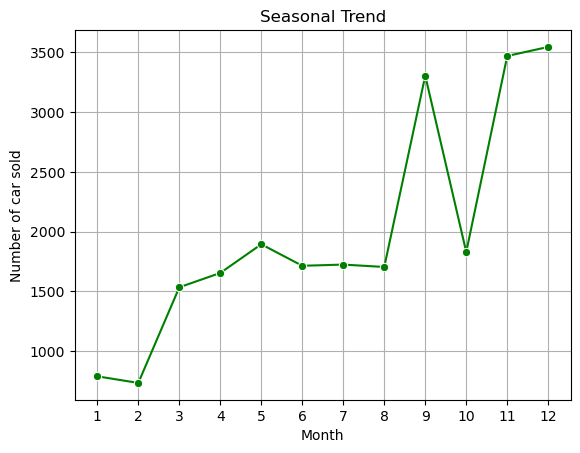

In [ ]:
ans = df.groupby('Month')['Car_id'].count().reset_index()
sns.lineplot(x=ans['Month'], y=ans['Car_id'], marker = 'o', color = 'g')
plt.grid()
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title('Seasonal Trend')
plt.ylabel('Number of car sold')
plt.show()

13. How does the car price distribution change when considering different combinations of body style and
transmission type?

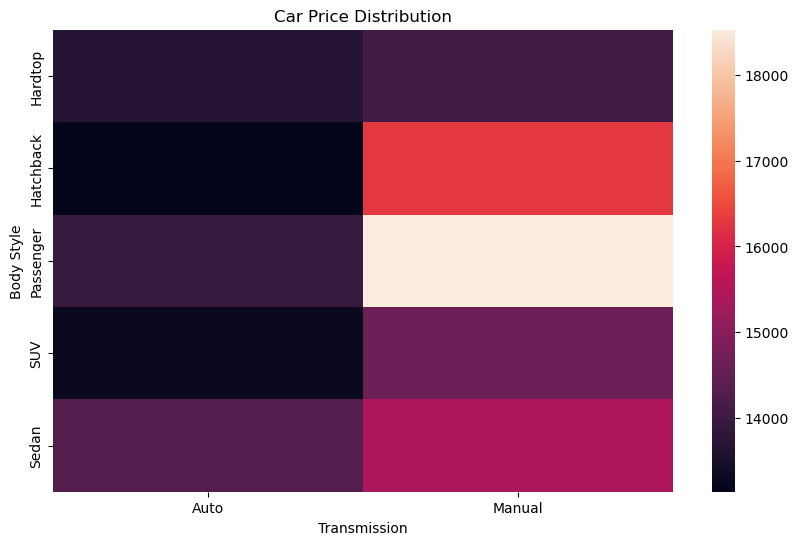

Transmission,Auto,Manual
Body Style,,
Hardtop,13687.756740,14072.501848
Hatchback,13144.014337,16284.049616
Passenger,13946.481932,18523.684163
SUV,13299.927913,14621.526541
Sedan,14310.910860,15440.056434


In [ ]:
ans = df.groupby(['Body Style', 'Transmission'])['Price ($)'].std().unstack()
plt.figure(figsize=(10,6))
plt.title('Car Price Distribution')
sns.heatmap(ans)
plt.show()
ans

14. What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact?

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Engine'] = encoder.fit_transform(df['Engine'])
df['Engine'] = df['Engine']+1

In [ ]:
ans = df[['Price ($)', 'Engine', 'Annual Income']].corr()
ans

,Price ($),Engine,Annual Income
Price ($),1.000000,-0.011271,0.012065
Engine,-0.011271,1.000000,-0.006598
Annual Income,0.012065,-0.006598,1.000000


<Axes: >

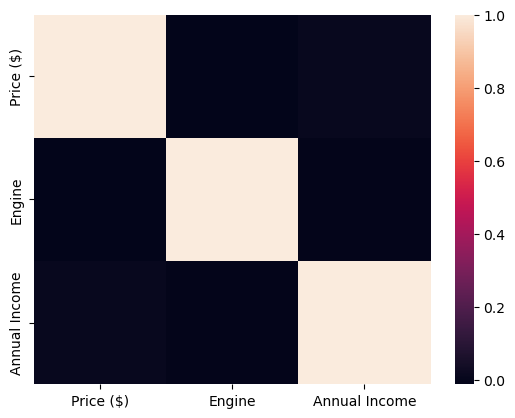

In [ ]:
sns.heatmap(ans)

15. How does the average car price vary across different car models and engine types?

In [ ]:
ans = df.groupby(['Model', 'Engine'])['Price ($)'].std().unstack()
ans.fillna(-1, inplace = True)
ans

Engine,1,2
Model,,
3-Sep,21403.933176,-1.000000
3000GT,8455.941265,2017.005771
300M,4229.419059,-1.000000
323i,4867.612734,140.052275
328i,10936.083663,23284.495002
...,...,...
Viper,7220.013156,154.323731
Voyager,171.349885,25381.191018
Windstar,6067.833501,237.186321


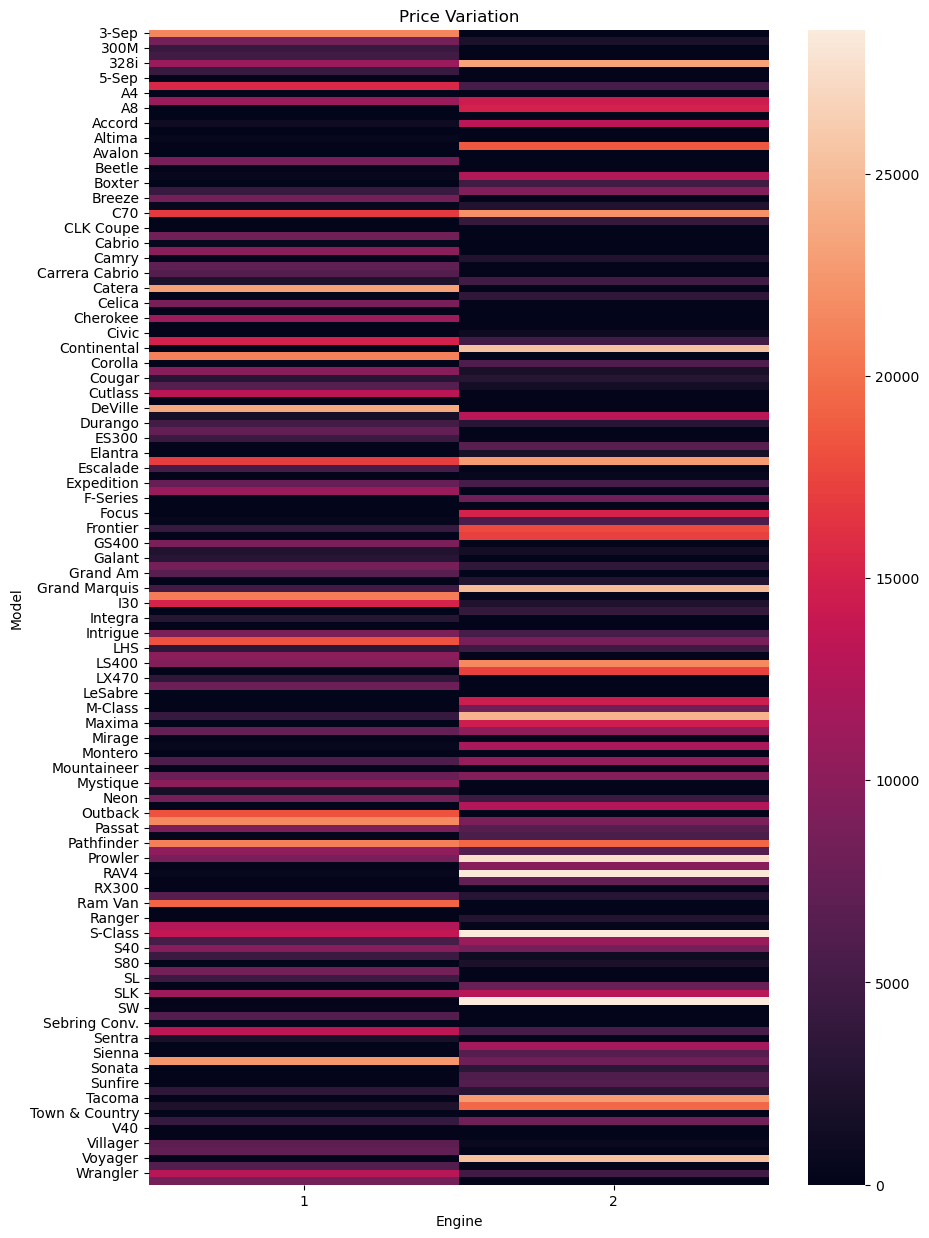

In [ ]:
plt.figure(figsize=(10,15))
sns.heatmap(ans)
plt.title('Price Variation')
plt.show()

# EDA 3: Amazon Sales Data

**Read Data Set**

In [ ]:
df = pd.read_csv('amazon.csv')
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [ ]:
df.shape

(1465, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

**Data Cleaning**

In [ ]:
df['discounted_price']=df['discounted_price'].str.replace("₹", "").str.replace(",","")

In [ ]:
df['discounted_price'] = df['discounted_price'].astype(float)

In [ ]:
df['actual_price']=df['actual_price'].str.replace("₹", "").str.replace(",","")

In [ ]:
df['actual_price'] = df['actual_price'].astype(float)

In [ ]:
df.rating.unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [ ]:
df['rating'] = df['rating'].str.replace('|','-1')

In [ ]:
df.rating.unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '-1', '2', '3', '2.6', '2.9'],
      dtype=object)

In [ ]:
df['rating'] = df['rating'].astype(float)

In [ ]:
df['rating_count'] = df['rating_count'].str.replace(",","")

In [ ]:
df[df['rating_count'].str.isnumeric() == False]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


In [ ]:
df['rating_count'] = df['rating_count'].astype(float)

In [ ]:
df['discount_percentage'] = df['discount_percentage'].str.replace("%","")

In [ ]:
df[~df['discount_percentage'].str.isnumeric()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


In [ ]:
df['discount_percentage'] = df['discount_percentage'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   int32  
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [ ]:
df['about_product'] = df['about_product'].str.split(" : ")
df = df.explode('about_product').reset_index(drop = True)

In [ ]:
df['category'] = df['category'].str.split("|")
df = df.explode('category').reset_index(drop = True)
df.shape

(9125, 16)

In [ ]:
df['review_title'] = df['review_title'].str.split(",")
df = df.explode('review_title').reset_index(drop = True)

In [ ]:
df.shape

(75934, 16)

**EDA**

1. What is the average rating for each product category?

In [ ]:
ans = df.groupby('category')['rating'].mean().reset_index()
ans

,category,rating
0,3DGlasses,3.500000
1,AVReceivers&Amplifiers,4.000000
2,Accessories,4.006522
3,Accessories&Peripherals,4.161689
4,Adapters,4.047368
...,...,...
312,WetGrinders,3.828000
313,WireboundNotebooks,4.403030
314,WirelessUSBAdapters,4.098065
315,WoodenPencils,4.300000


2. What are the top rating_count products by category?

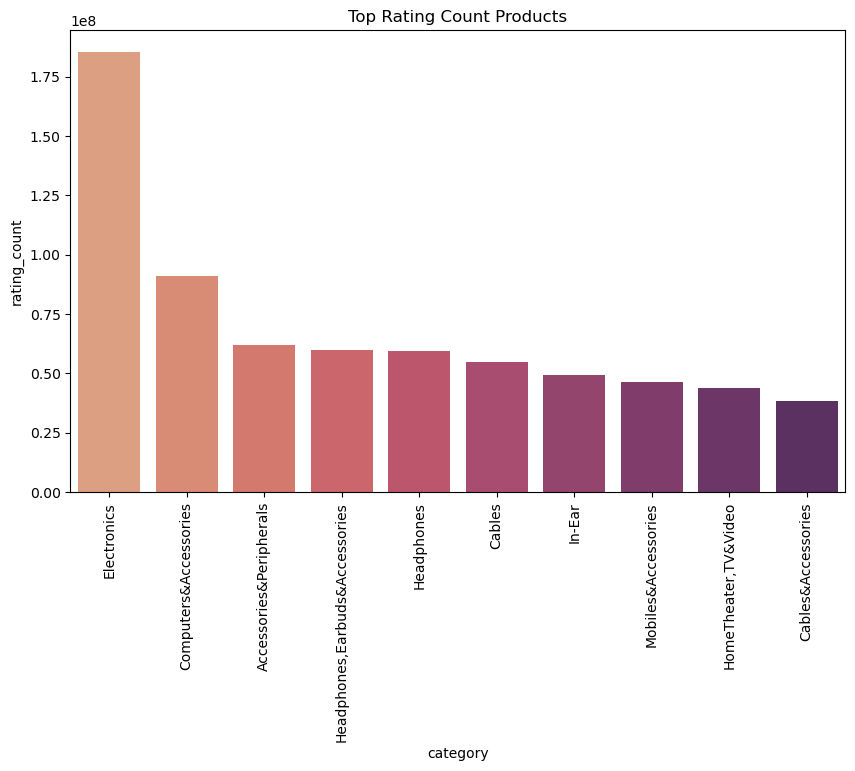

Top  10 rating_count products by category are: 


,category,rating_count
0,Electronics,185365022.0
1,Computers&Accessories,90873595.0
2,Accessories&Peripherals,61805846.0
3,"Headphones,Earbuds&Accessories",59657646.0
4,Headphones,59309300.0
5,Cables,54780850.0
6,In-Ear,49207450.0
7,Mobiles&Accessories,46274693.0
8,"HomeTheater,TV&Video",43857536.0
9,Cables&Accessories,38265166.0


In [ ]:
ans = df.groupby('category')['rating_count'].sum().sort_values(ascending = False).reset_index()
ans = ans.head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='category', y='rating_count', data = ans, palette='flare')
plt.title('Top Rating Count Products')
plt.xticks(rotation = 90)
plt.show()

print("Top  10 rating_count products by category are: ")
ans

3. What is the distribution of discounted prices vs. actual prices?

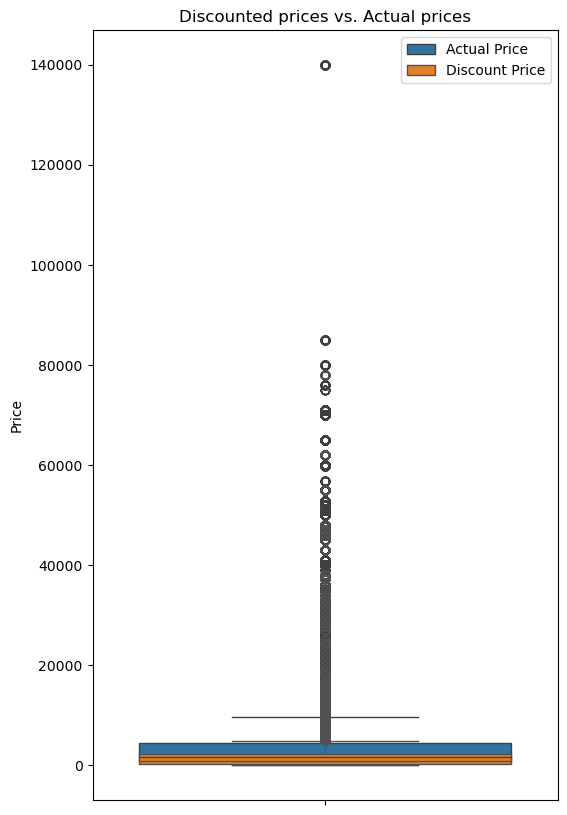

In [ ]:
plt.figure(figsize=(6,10))
sns.boxplot(df['actual_price'], label = 'Actual Price')
sns.boxplot(df['discounted_price'], label = 'Discount Price')
plt.legend()
plt.ylabel('Price')
plt.title('Discounted prices vs. Actual prices')
plt.show()

4. How does the average discount percentage vary across categories?

In [ ]:
ans = df.groupby('category')['discount_percentage'].mean().reset_index()
ans

,category,discount_percentage
0,3DGlasses,23.000000
1,AVReceivers&Amplifiers,36.000000
2,Accessories,56.904348
3,Accessories&Peripherals,55.934724
4,Adapters,82.210526
...,...,...
312,WetGrinders,23.600000
313,WireboundNotebooks,5.636364
314,WirelessUSBAdapters,49.019355
315,WoodenPencils,0.000000


5. What are the most popular product names?

In [ ]:
ans = df['product_name'].value_counts().sort_values(ascending = False).reset_index()
ans[ans['count'] == ans['count'].max()]

,product_name,count
0,Wayona Nylon Braided USB to Lightning Fast Cha...,600
1,Pinnaclz Original Combo of 2 Micro USB Fast Ch...,600


6. What are the most popular product keywords?

In [ ]:
ans = df['category'].value_counts().sort_values(ascending = False).reset_index().head(10)
ans

,category,count
0,Electronics,6849
1,Computers&Accessories,5668
2,Home&Kitchen,4803
3,Accessories&Peripherals,4795
4,Kitchen&HomeAppliances,3365
5,Cables,3220
6,Cables&Accessories,3014
7,"HomeTheater,TV&Video",2954
8,USBCables,2929
9,SmallKitchenAppliances,2083


7. What are the most popular product reviews?

In [ ]:
ans = df['review_title'].value_counts().sort_values(ascending = False).reset_index().head(10)
ans

,review_title,count
0,Good,4282
1,Good product,2856
2,Value for money,1443
3,Nice product,1105
4,Nice,1067
5,Good quality,732
6,Good Product,619
7,Ok,520
8,Good one,411
9,good,309


8. What is the correlation between discounted _price and rating?

In [ ]:
df[['discounted_price', 'rating']].corr()

,discounted_price,rating
discounted_price,1.000000,0.131641
rating,0.131641,1.000000


9. What are the Top 5 categories based on the highest ratings?

In [ ]:
df.groupby('category')['rating'].max().sort_values(ascending = False).reset_index().head(5)

,category,rating
0,USBCables,5.0
1,Computers&Accessories,5.0
2,Mice,5.0
3,Cables&Accessories,5.0
4,Cables,5.0


10. Identify any potential areas for improvement or optimization based on the data analysis.

Following are the improvements
- Low discounted items have low sales, so give discount in that to increase the sales.
- discounted price have also good ratings(they are poitively correlated)
- Focus on improvements in quality of the low rating items.
- Keep items having more counts like electronics, Computers&Accessories, ets always in stock.
- High rating product have more sales and low raing counts have low sale, so keep more high rating product available as compared to low rating products.

# EDA 4: Spotify Data:Popular Hip-Hop Artists and Tracks

**Read the CSV file**

In [ ]:
df = pd.read_csv('spotify.csv')
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


1. Read the dataframe, check null value if present then do the needful, check duplicate row,, if present then do
the needful.

In [ ]:
# NULL Values Checking
df.isnull().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [ ]:
# Duplicate Row checking
df.duplicated().sum()

27

In [ ]:
# There are 27 duplicate rows
# Deleting all the duplicate row
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()# Duplicate Row re-checking

0

In [ ]:
df = df.reset_index(drop = True)

2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

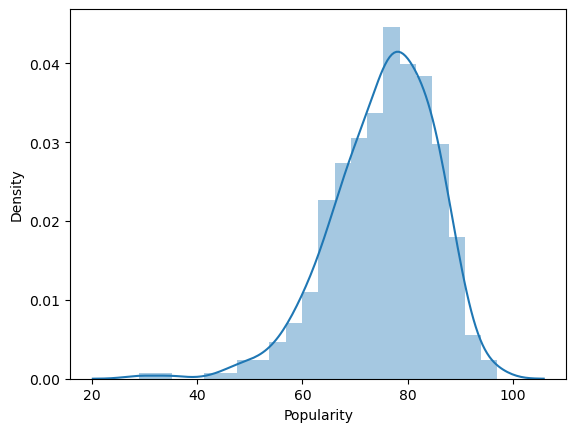

In [ ]:
sns.distplot(df['Popularity'])
plt.show()

3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

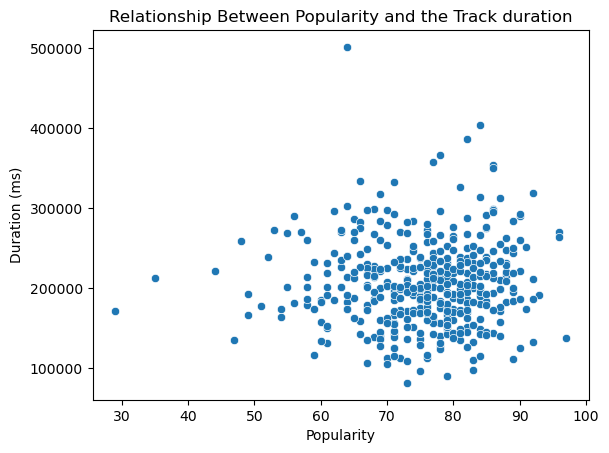

,Popularity,Duration (ms)
Popularity,1.000000,0.038992
Duration (ms),0.038992,1.000000


In [ ]:
sns.scatterplot(x='Popularity', y='Duration (ms)', data = df, palette='coolwarm')
plt.title('Relationship Between Popularity and the Track duration')
plt.show()
df[['Popularity','Duration (ms)']].corr()

4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot.

In [ ]:
df['Artist'].value_counts().reset_index().head(1)

,Artist,count
0,Drake,17


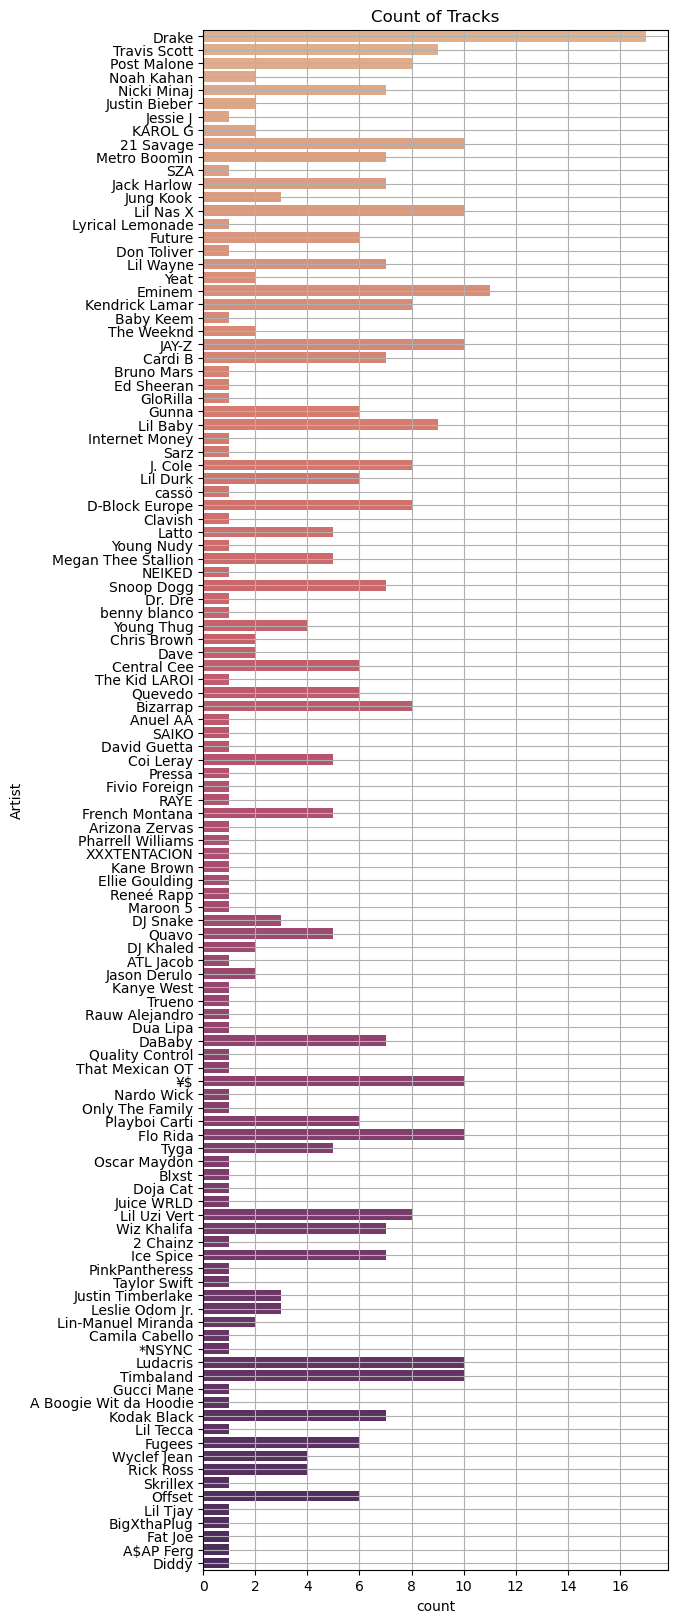

In [ ]:
plt.figure(figsize=(6,20))
sns.countplot(df['Artist'], palette='flare')
plt.grid()
plt.title('Count of Tracks')
plt.show()

5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [ ]:
df[['Track Name','Popularity']].sort_values(by = 'Popularity').head()

,Track Name,Popularity
199,Attachments (feat. Coi Leray),29
219,Intentions,35
390,Splash Brothers,44
213,On Me - Remix,47
384,911 (feat. Mary J. Blige),48


6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist.

In [ ]:
ans = df.groupby('Artist')['Popularity'].mean().reset_index()
ans.sort_values(by='Popularity', ascending = False).head()

,Artist,Popularity
113,cassö,92.000000
104,Trueno,89.000000
24,David Guetta,87.000000
103,Travis Scott,86.555556
114,¥$,85.100000


7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [ ]:
ans = df.groupby('Artist').apply(lambda x: x.loc[x['Popularity'].idxmax()]).reset_index(drop=True)
ans.sort_values(by='Popularity', ascending=False).head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
47,Jack Harlow,Lovin On Me,97,138411,4xhsWYTOGcal8zt0J161CU
114,¥$,CARNIVAL,96,264324,3w0w2T288dec0mgeZZqoNN
2,21 Savage,redrum,96,270697,52eIcoLUM25zbQupAZYoFh
103,Travis Scott,FE!N (feat. Playboi Carti),93,191700,42VsgItocQwOQC3XWZ8JNA
113,cassö,Prada,92,132359,59NraMJsLaMCVtwXTSia8i


8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

In [ ]:
numerical_feature = [feature for feature in df if df[feature].dtype!='O']

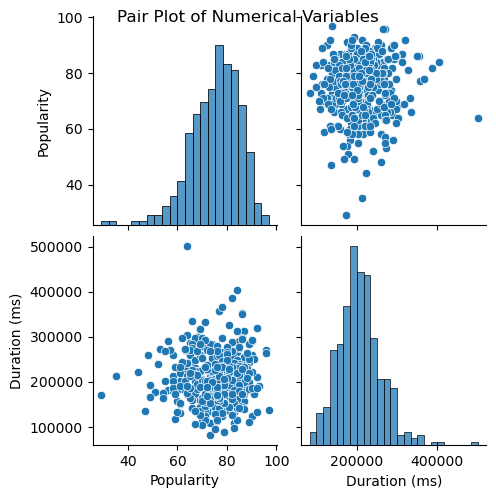

In [ ]:
sns.pairplot(df[numerical_feature])
plt.suptitle('Pair Plot of Numerical Variables')
plt.show()

9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot.

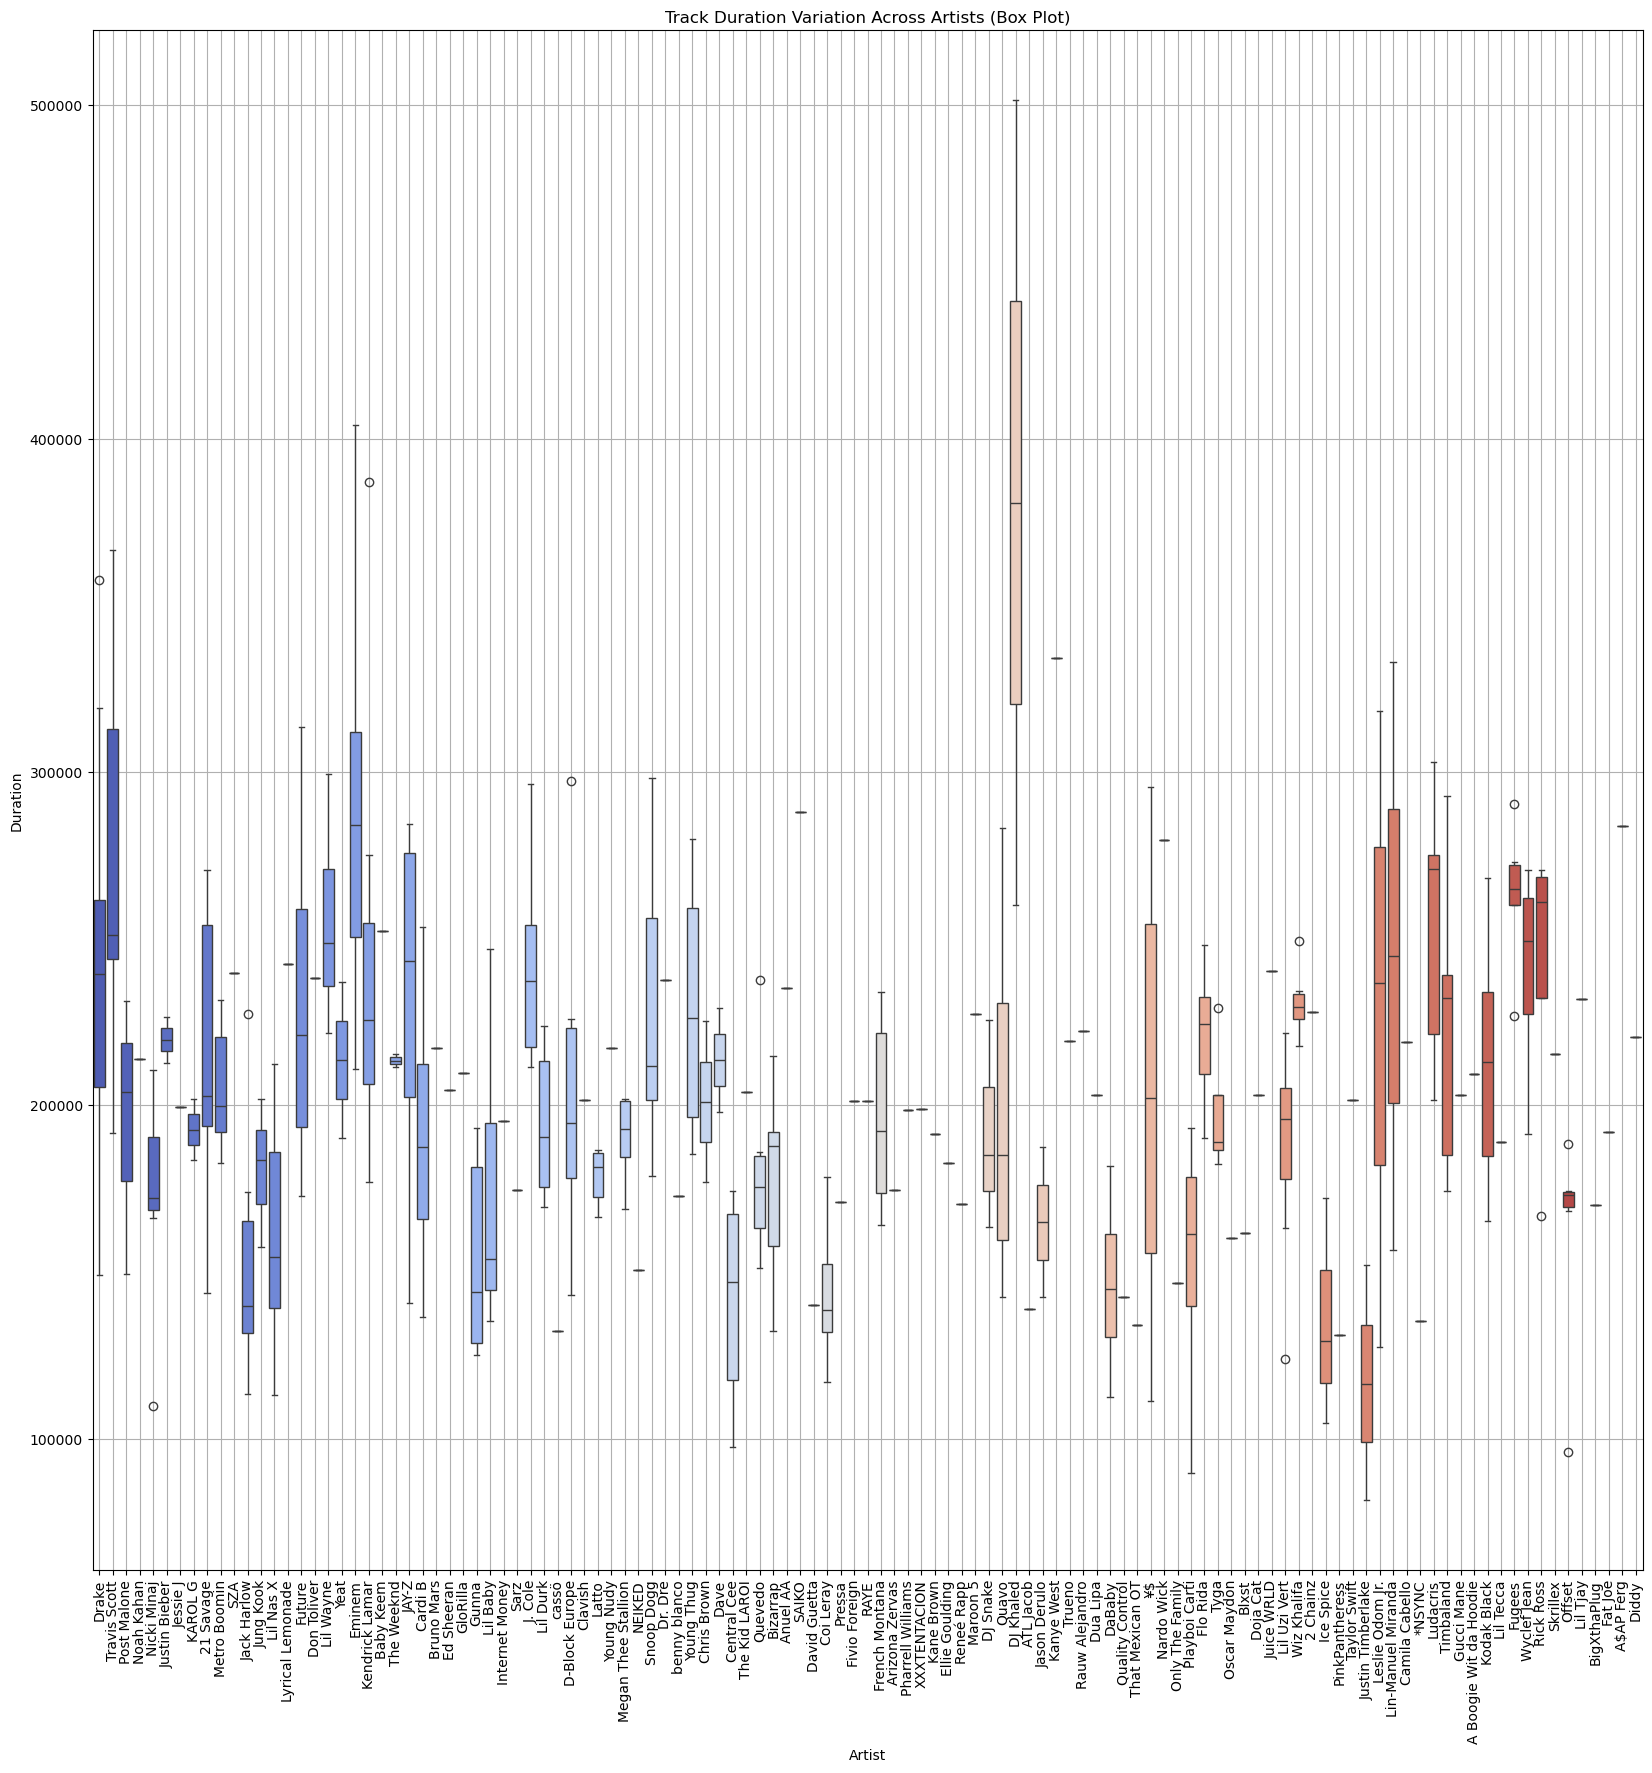

In [ ]:
plt.figure(figsize=(20,20))
sns.boxplot(x=df['Artist'], y=df['Duration (ms)'], palette="coolwarm")
plt.xticks(rotation = 90)
plt.xlabel("Artist")
plt.ylabel("Duration")
plt.title("Track Duration Variation Across Artists (Box Plot)")
plt.grid()
plt.show()

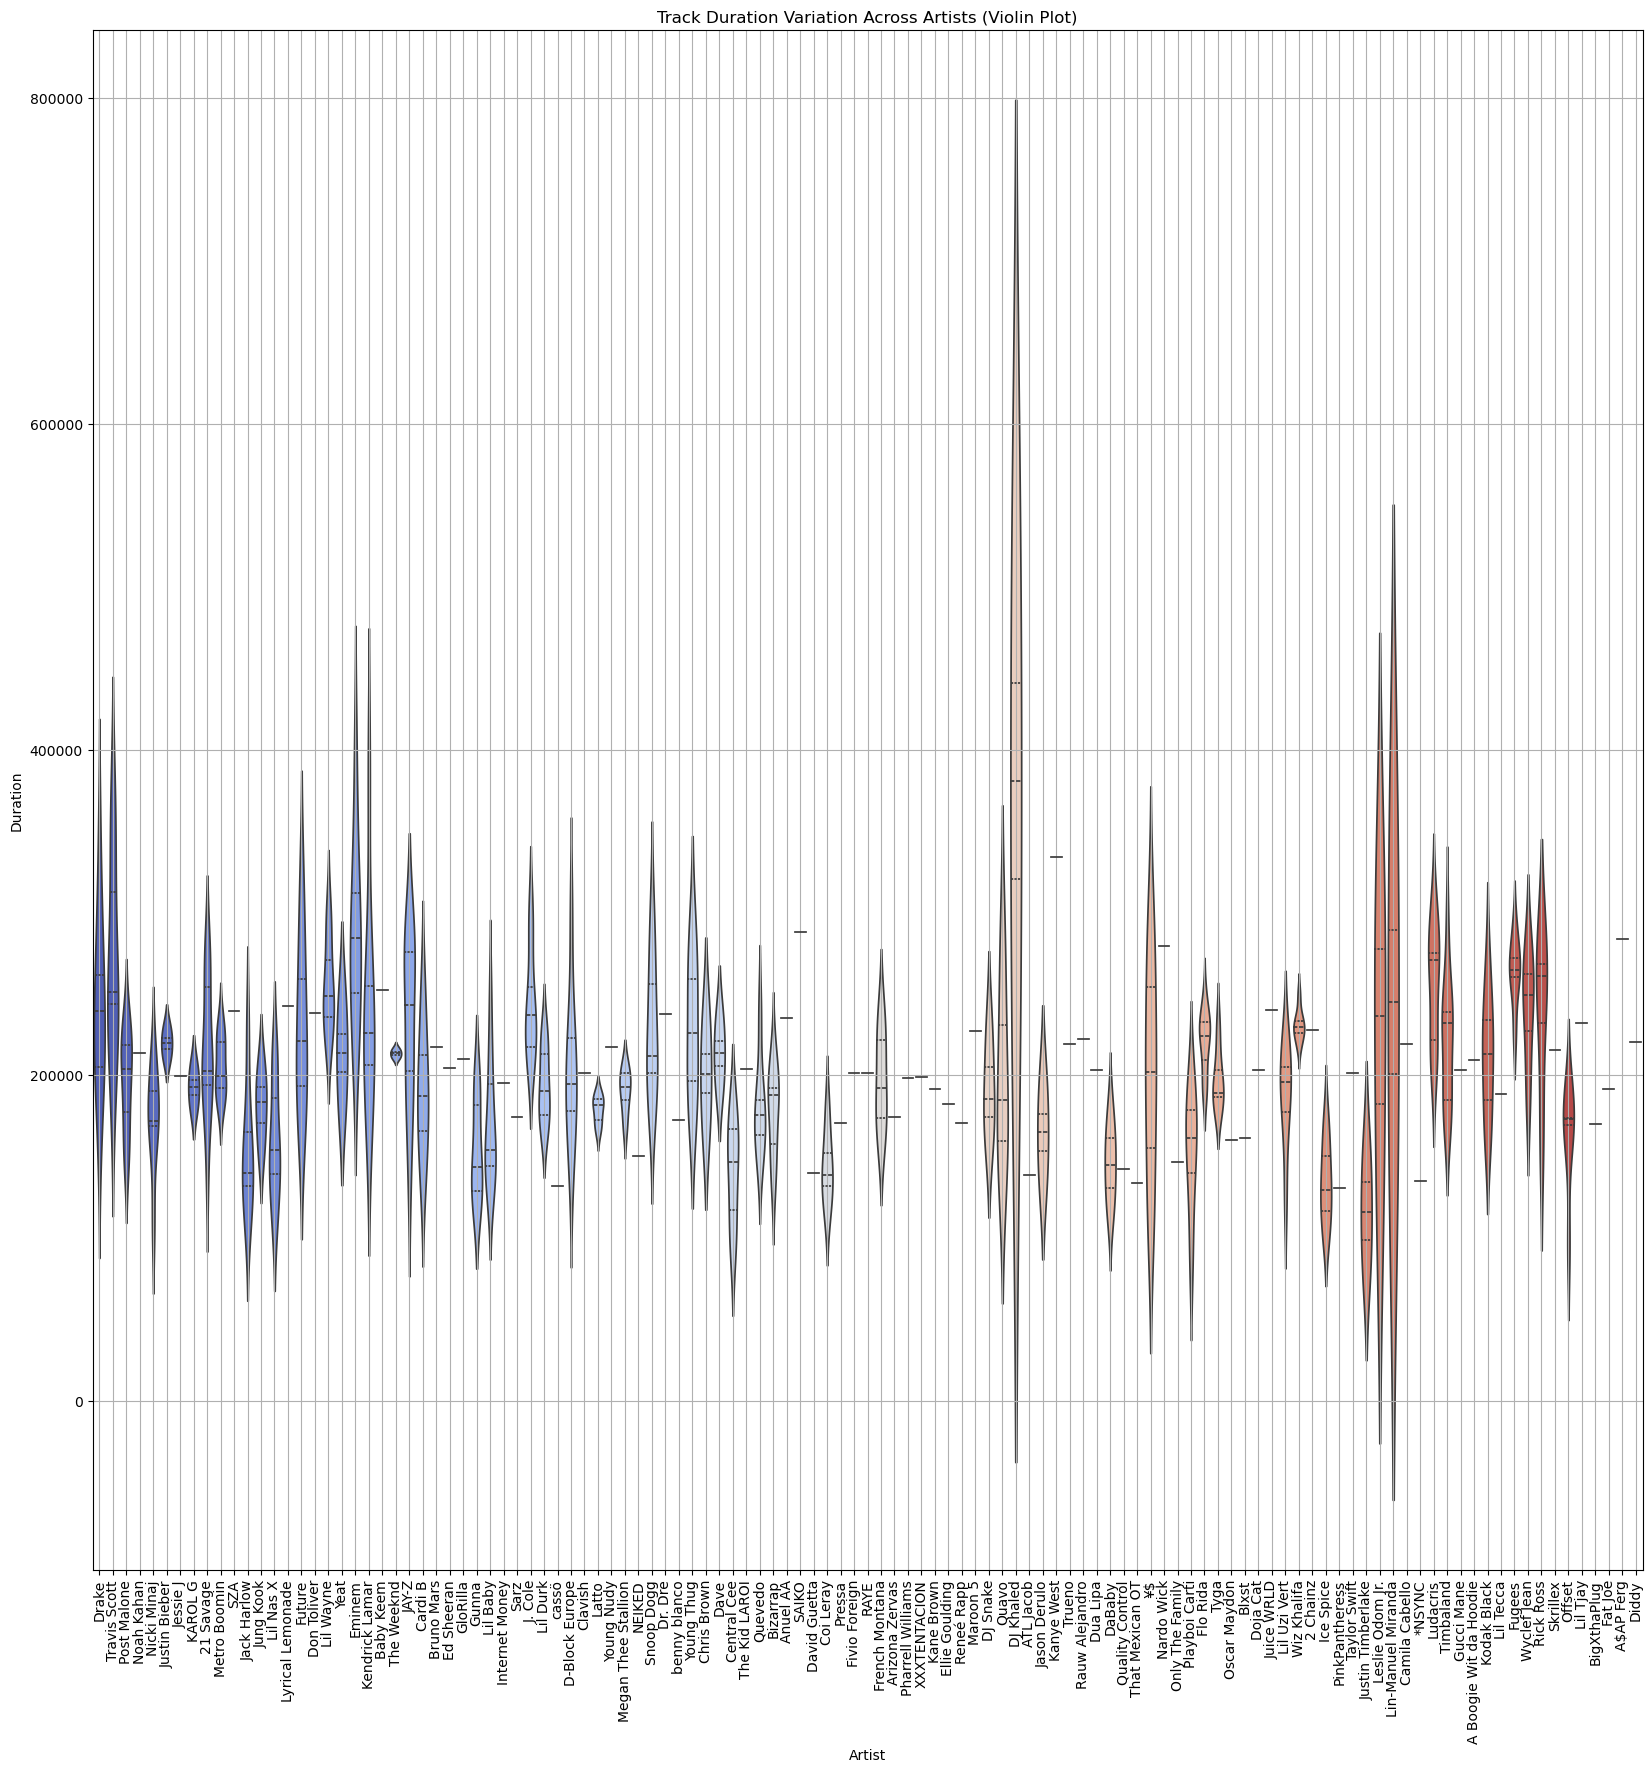

In [ ]:
plt.figure(figsize=(20,20))
sns.violinplot(x=df['Artist'], y=df['Duration (ms)'], palette="coolwarm", inner="quartile")
plt.xticks(rotation = 90)
plt.xlabel("Artist")
plt.ylabel("Duration")
plt.title("Track Duration Variation Across Artists (Violin Plot)")
plt.grid()
plt.show()

10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.

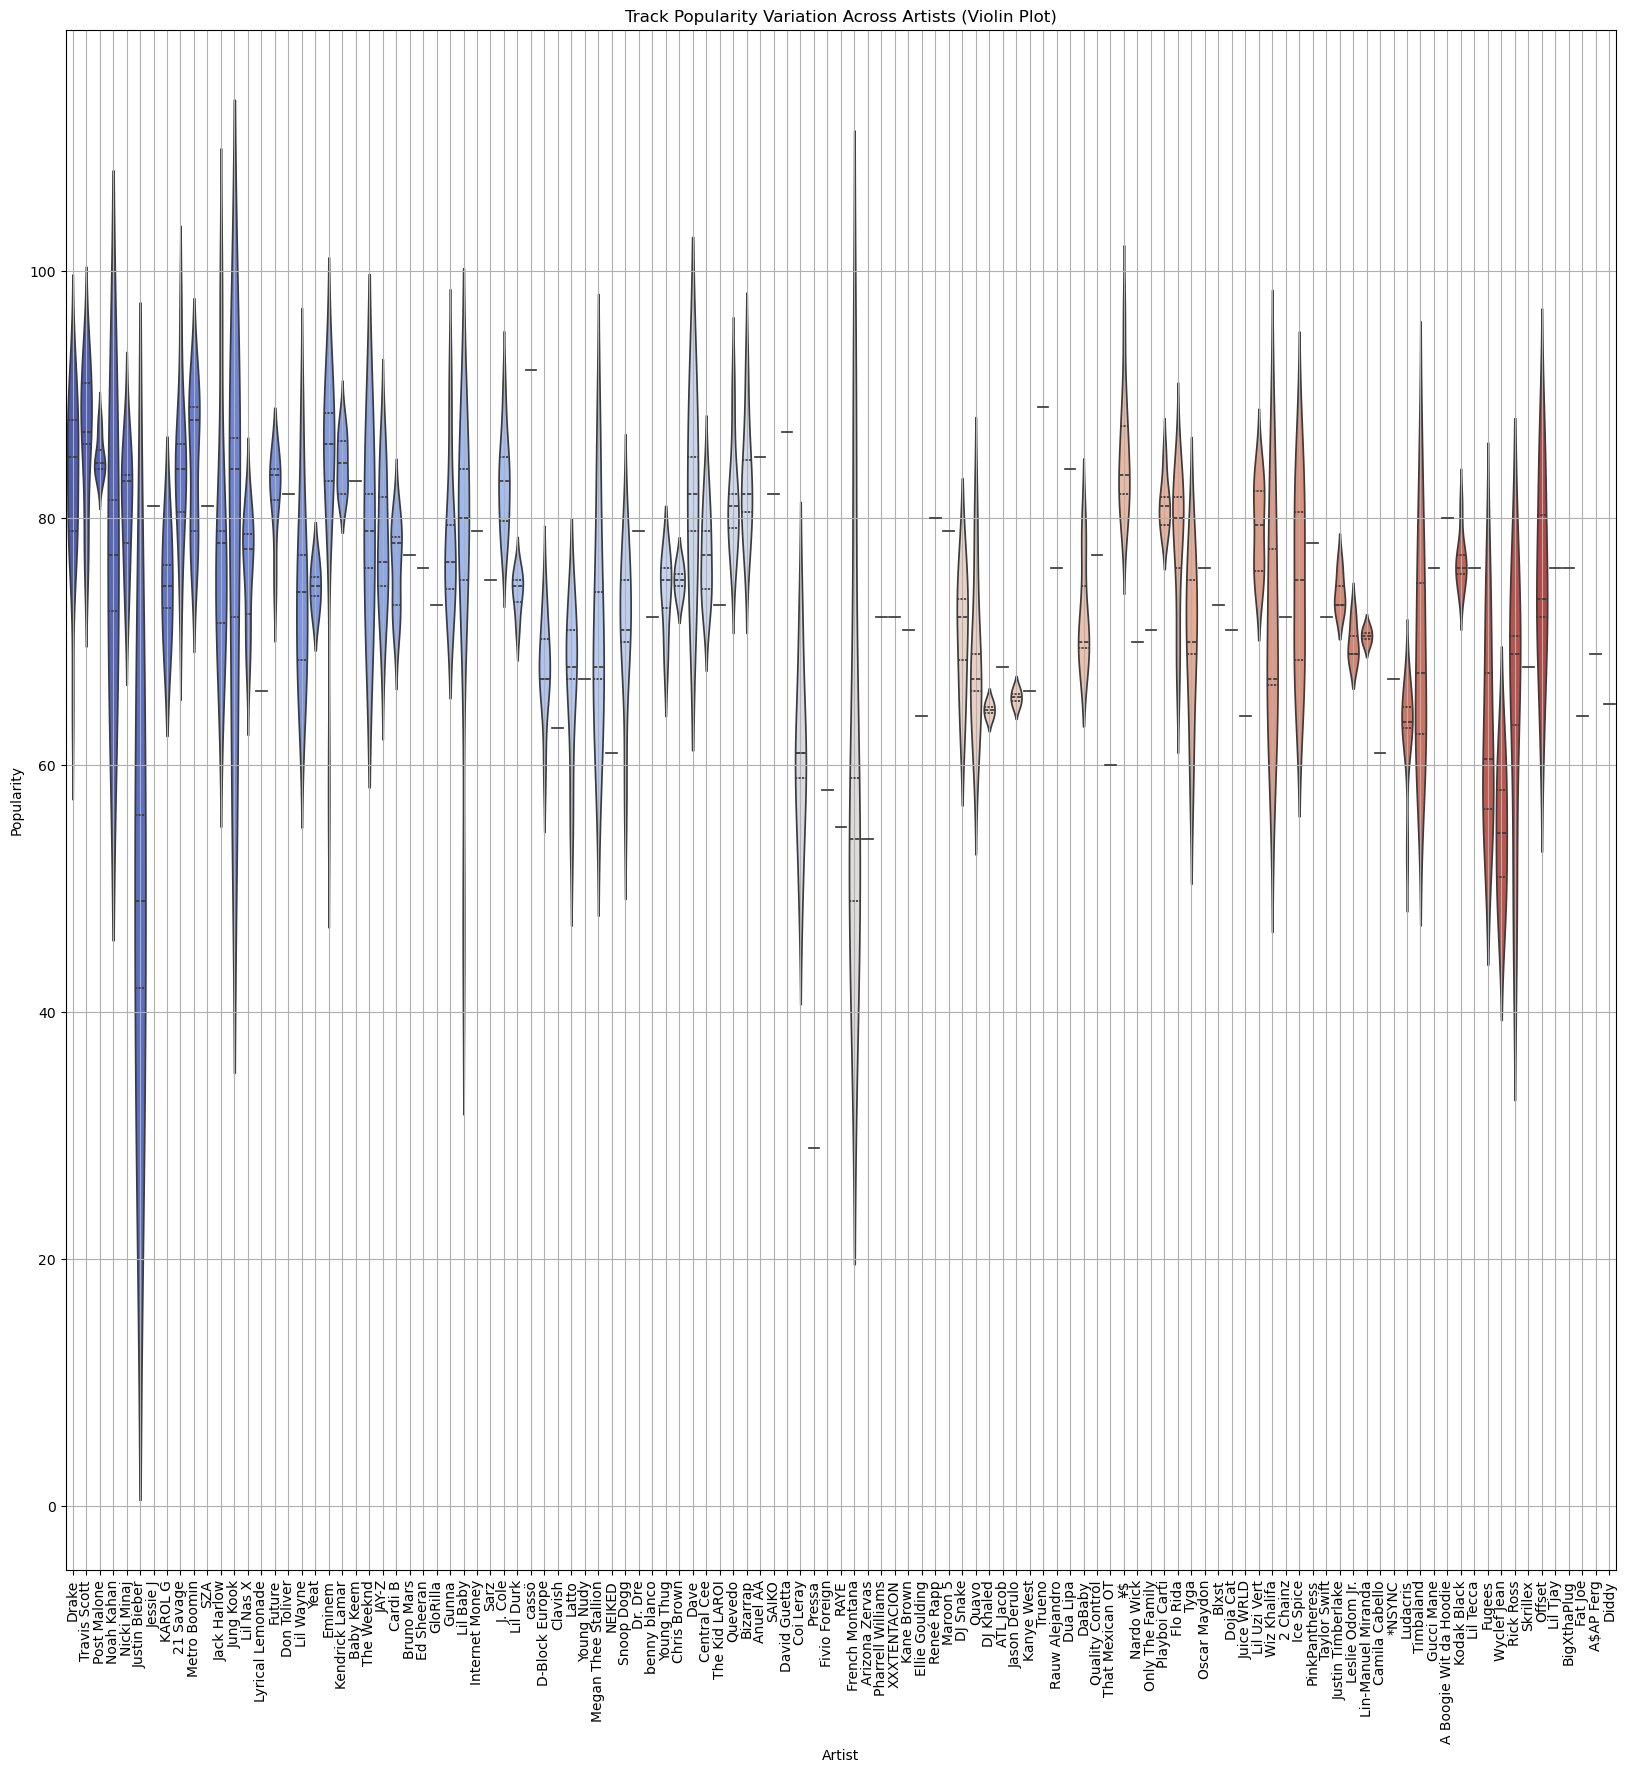

In [ ]:
plt.figure(figsize=(20,20))
sns.violinplot(x=df['Artist'], y=df['Popularity'], palette="coolwarm", inner="quartile")
plt.xticks(rotation = 90)
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.title("Track Popularity Variation Across Artists (Violin Plot)")
plt.grid()
plt.show()

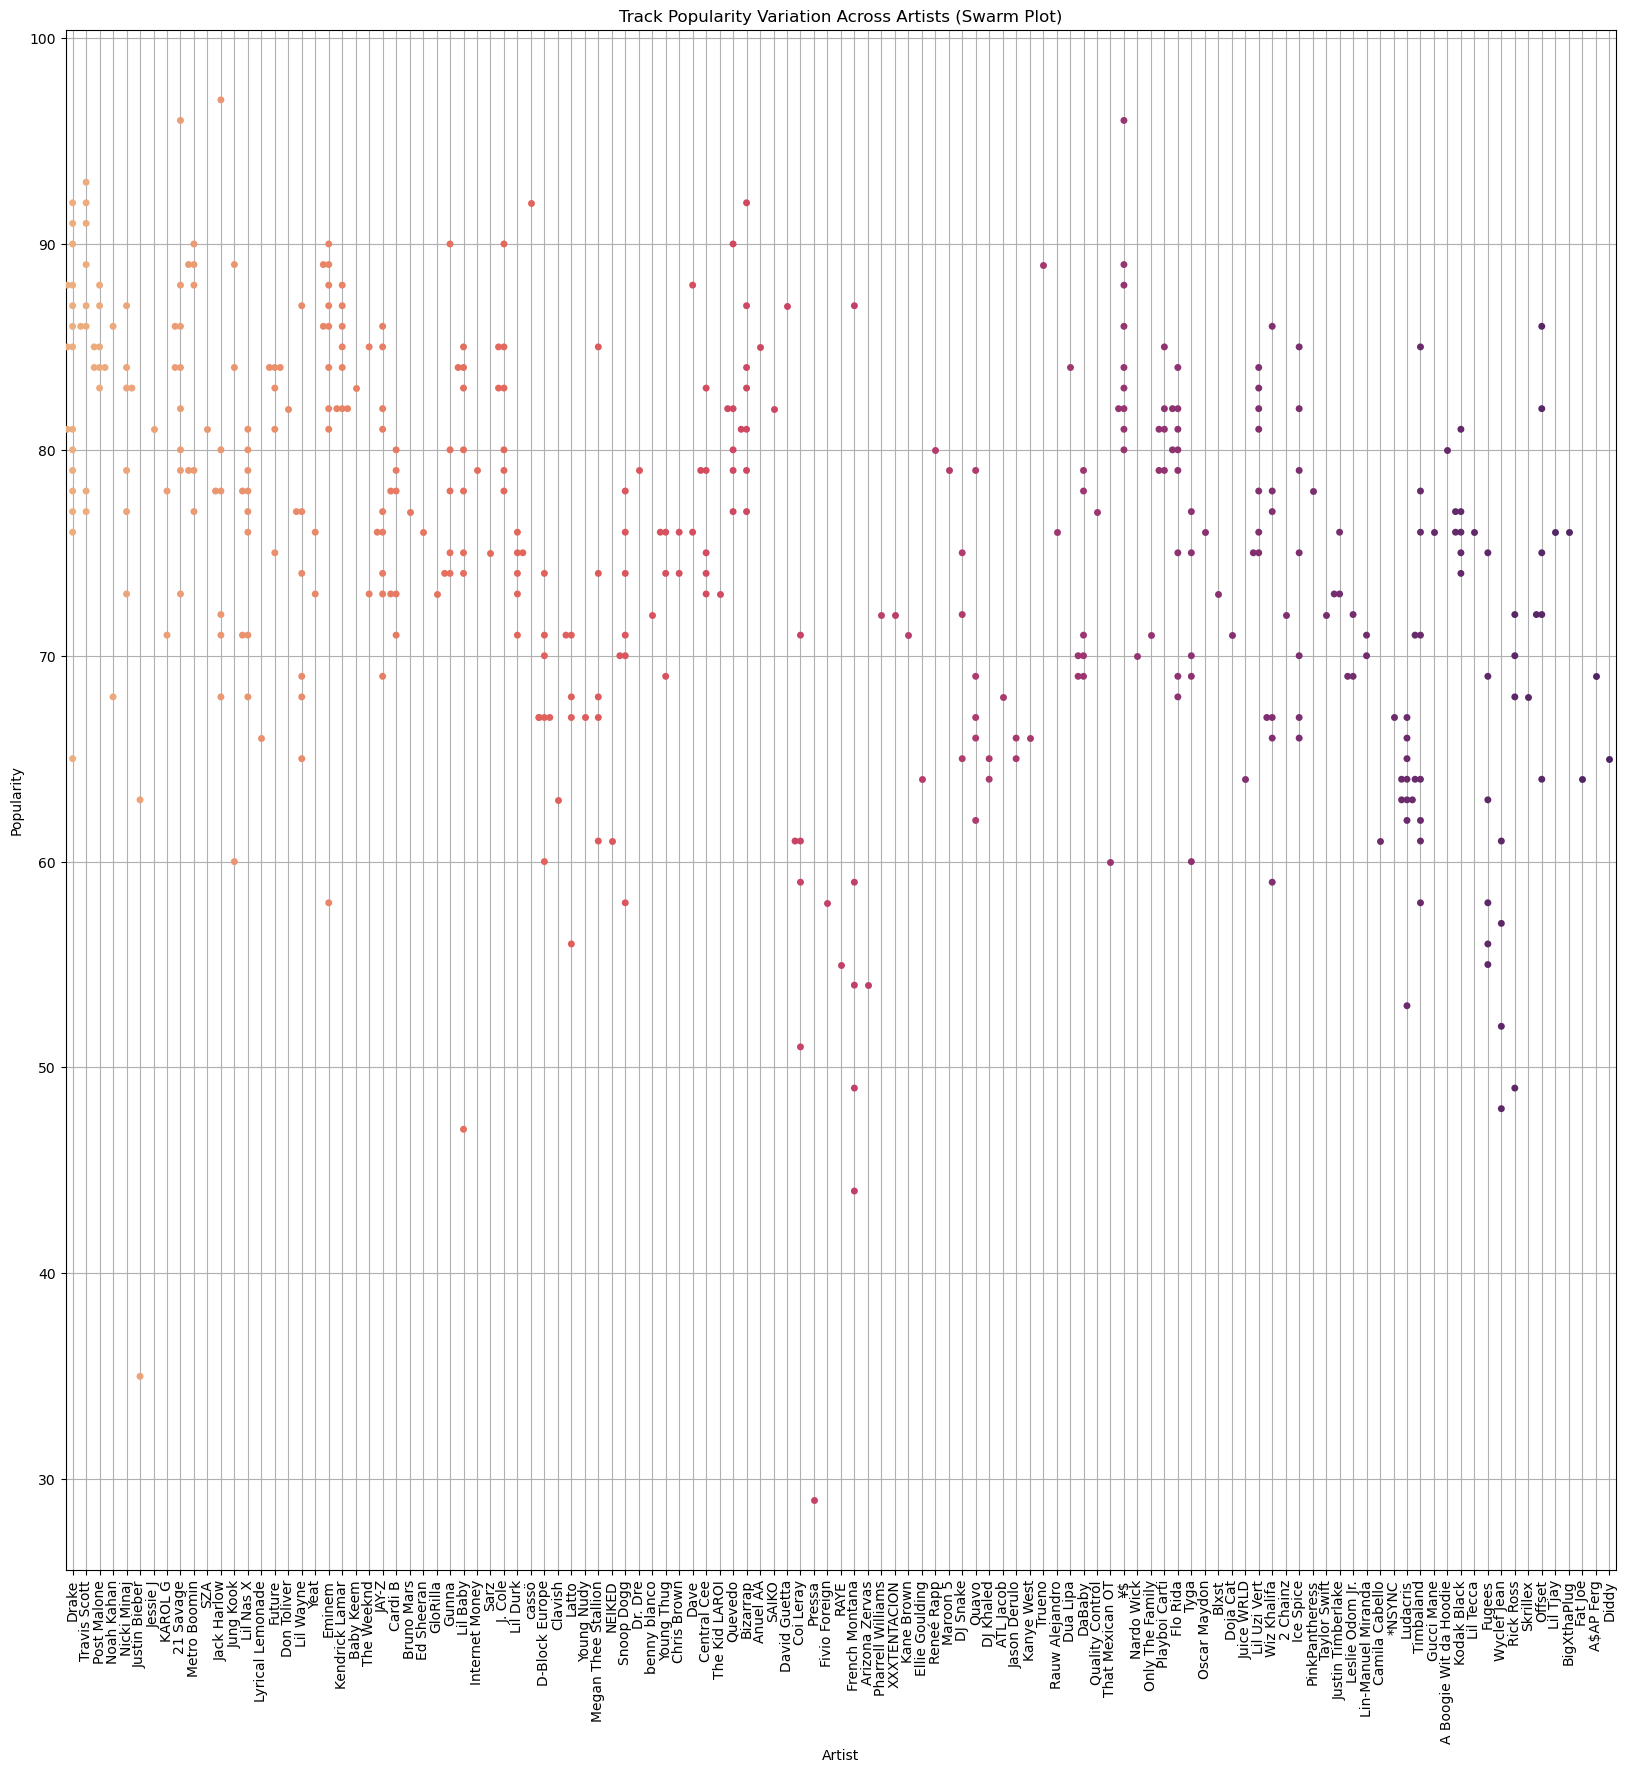

In [ ]:
plt.figure(figsize=(20,20))
sns.swarmplot(x=df['Artist'], y=df['Popularity'], palette="flare")
plt.xticks(rotation = 90)
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.title("Track Popularity Variation Across Artists (Swarm Plot)")
plt.grid()
plt.show()